<a href="https://colab.research.google.com/github/limited-fion/deep-learning-cw/blob/master/02_CNN_Introduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Convolutional Neural Networks

This tutorial addresses the basic concepts regarding Convolutional Neural Networks and their implementation using the Keras framework.
Convolutional Neural Networks (CNNs) are a class of feed-forward artificial neural architecture. They are applied to analyse visual 2D imagery, meaning that we can feed images directly into a CNN without the need to flatten them into a 1D vector as done in the previous tutorial.
CNNs have revolutionised the field of computer vision in the last decade. In 2012 Alex Krizhevsky introduced the AlexNet architecture to win the ImageNet Challenge (one of the most important competitions on image classification within the Computer Vision community), by reducing the top-5 error more than 10 percentage points, which was an incredible improvement at that time. As of now, CNNs are used not only on image classification but in many other computer vision tasks.

![](https://cdn-5f733ed3c1ac190fbc56ef88.closte.com/wp-content/uploads/2017/03/alexnet_small-1.png)

The image above is from [cv-tricks' blog](https://cv-tricks.com/cnn/understand-resnet-alexnet-vgg-inception/) and shows the proposed AlexNet architecture. It is composed of 5 convolutional layers followed by 3 fully connected layers. Nowadays, we can find much deeper and more complex architectures, which outperform AlexNet on the ImageNet Challenge. 







## CNN Structure

The basic pipeline of common CNNs consists of an image as input and a stack of convolutional layers that extract a feature representation from the input image. The final shape of the image representation is conditioned on the type of problem/task that the architecture is facing. For instance, the output of the last layer in a classification problem is a probability vector. Each dimension of the probability vector represents how likely is that the input image belongs to a specific class. However, the architecture design is up to us, and therefore, we could code a network that outputs a single value for regression problems, or that generates a new image map for semantic segmentation. Now, let's dig in a bit into CNN and introduce some layers that are widely used. 

### 2D Convolutional Layer

The most common layer in any CNN architecture is the 2D convolutional layer. Convolutional layers are specifically designed to extract features from images or even extract features from previously extracted features. As shown in the following illustration, 2D convolutions apply the same filter to the full image. And therefore, due to its nature, 2D convolutional filters exploit the local information presented in images, making them a powerful tool for image analysis. 

![](https://cdn-images-1.medium.com/max/800/1*Fw-ehcNBR9byHtho-Rxbtw.gif)

Image [source](https://towardsdatascience.com/intuitively-understanding-convolutions-for-deep-learning-1f6f42faee1).

The latest deep learning frameworks have made possible the integration of convolutional layers easily on our architectures with only a single line of code. We will address here how 2D convolutions work since full understanding is needed to comprehend how any CNN operates. The following images and some explanations can be further explored on the original [Irhum Shafkat's blog](https://towardsdatascience.com/intuitively-understanding-convolutions-for-deep-learning-1f6f42faee1) or in the [Neural Networks and Deep Learning](http://neuralnetworksanddeeplearning.com/) book. Both are strongly recommended.

To understand 2D convolutions, we need to define first what a kernel is. Kernels are simply matrices of numbers. The numbers on the kernels are the so-called weights, and the weights on the kernels change as we train the network. Hence, network training aims to optimise the network's parameters (update the kernel weights) such that the cost function is minimised. 

The 2D convolution operation takes the network's kernels and "slides" them over the input image (alike to a sliding window) as in the following image from [PyImageSearch](https://www.pyimagesearch.com/2015/03/23/sliding-windows-for-object-detection-with-python-and-opencv/) blog:

![](https://pyimagesearch.com/wp-content/uploads/2014/10/sliding_window_example.gif)

In each step, the network performs an element-wise multiplication with the elements that are currently on. The results of this elementwise multiplication are added to obtain the output value of the operation. CNNs repeat previous step for all the positions of the sliding window, composing at the end the feature map. This generated feature map can go through another 2D convolutional layer and create more powerful features. 

> 

![](https://cdn-images-1.medium.com/max/800/1*Zx-ZMLKab7VOCQTxdZ1OAw.gif)

> 
The previous image shows the 2D convolution operation. Thus, the new feature values are the weighted sum of all the elements in the sliding window after the elementwise multiplication between input and kernel.  The bigger the size of the kernel is, the more feature elements contribute to the final output value. In contrast to fully connected layers, where a new feature value is a weighted sum over **all** input values, as mentioned, 2D convolutions compute features based on local areas. In other words, instead of looking at every input component, they consider only features coming from close locations. 

In the above example, the input image on the left has a size of 5x5 and the dimension of the resulting feature map is 3x3, showing that the size of the output maps is not always equal to the input. Hence, the output size can be computed by doing:

$O = W - K + 1$,

where $O$ is the output height/length, $W$ is the input height/length and $K$ is the kernel size. The output size is not only conditioned on the input size but also on the kernel size. Check in the following code cell how the output feature map shape changes as you increase the kernel size. In Keras, we define the layer by using `Conv2D` from `keras.layers` (documentation [here](https://keras.io/layers/convolutional/#conv2d)).









In [ ]:
import numpy as np
import keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D

# Generate dummy data
input_feature = np.random.random((1, 100, 100, 1))

# input: 100x100 image with 1 channels -> (100, 100, 1) tensor.
# this applies 1 convolution filter of size 3x3 each.
model = Sequential()
model.add(Conv2D(1, (3, 3), input_shape=(100, 100, 1)))

output_feature = model.predict(input_feature)

print('Input size: ({:}, {:})'.format(input_feature.shape[1], input_feature.shape[2]))
print('Output size: ({:}, {:})'.format(output_feature.shape[1], output_feature.shape[2]))

1/1 [==============================] - 12s 12s/step
Input size: (100, 100)
Output size: (98, 98)


Moreover, the kernel size and the input size are not the only parameters affecting the output size. We are going to introduce two extra elements that change the size of the output map: the padding and the stride.

### Adding Padding to Input Features

In some tasks, such as [image translation](https://arxiv.org/pdf/1611.07004.pdf), we need the output size to be equal to the input size. The solution to that is using padding, where extra edges are added to the input features so that the dimension is not reduced after the convolutional layer. Normally those pixels have $0$ value (termed zero-padding), but depending on the application other methods could be used, e.g., reflection or symmetric padding.

![](https://cdn-images-1.medium.com/max/800/1*1okwhewf5KCtIPaFib4XaA.gif)

If padding is used, the new output size can be computed by doing:

$O = W - K + 2P+ 1$, 

where $P$ is the padding value. $P$ must be set in concordance with the kernel size if dimensionality wants to be preserved. Padding can be added to the `Conv2d` layer in Keras by using the padding argument and selecting one of the two settings: `valid`, which is the default value and means no padding; and `same`, which adapts the padding value to have the same output size as input size.

In [ ]:
import numpy as np
import keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D

# Generate dummy data
input_feature = np.random.random((1, 100, 100, 1))

# input: 100x100 image with 1 channels -> (100, 100, 1) tensor.
# this applies 1 convolution filter of size 3x3 each.
# attribute padding='same' applies zero-padding to the input feature map
model = Sequential()
model.add(Conv2D(1, (3, 3), input_shape=(100, 100, 1), padding='same'))

output_feature = model.predict(input_feature)

print('Input size: ({:}, {:})'.format(input_feature.shape[1], input_feature.shape[2]))
print('Output size: ({:}, {:})'.format(output_feature.shape[1], output_feature.shape[2]))

1/1 [==============================] - 0s 221ms/step
Input size: (100, 100)
Output size: (100, 100)


### Using Stride in Convolutional Layers

The stride operation allows the convolutional layers to skip some of the sliding windows explained above. Hence, instead of jumping one pixel apart, we can define the number of skipped elements before computing the weighting sum between the kernel's weights and input features. A stride of 1 means that features will be extracted from all windows a pixel apart, so basically, every single window is computed. A stride of 2 means that we are selecting windows 2 pixels apart, skipping every other window in the process. Strides reduce the number of computations and consequently the size of the output map. In practice, as we go deeper into the CNN, the spatial size of the feature map gets smaller while the number of channels increases. Moreover, we can further reduce the size of the feature map using pooling operations, which we introduce later in this tutorial.

![](https://cdn-images-1.medium.com/max/800/1*BMngs93_rm2_BpJFH2mS0Q.gif)

If strides are used, the new output size can be computed as:

$O = \dfrac{W - K + 2P}{S}+ 1$, 

where $S$ is the stride value. The stride is set in the layer by using the `strides` argument.

In [ ]:
import numpy as np
import keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D

# Generate dummy data
input_feature = np.random.random((1, 100, 100, 1))

# input: 100x100 image with 1 channels -> (100, 100, 1) tensor.
# this applies 1 convolution filter of size 3x3 each.
# attribute padding='same' applies zero-padding to the input feature map
# attribute strides=2 applies applies stride of 2
model = Sequential()
model.add(Conv2D(1, (3, 3), input_shape=(100, 100, 1), padding='same', strides=2))

output_feature = model.predict(input_feature)

print('Input size: ({:}, {:})'.format(input_feature.shape[1], input_feature.shape[2]))
print('Output size: ({:}, {:})'.format(output_feature.shape[1], output_feature.shape[2]))

1/1 [==============================] - 0s 57ms/step
Input size: (100, 100)
Output size: (50, 50)


## Differences Between Kernel and Filters

The examples above take as input a single-channel image and compute a feature map with also one channel. However, when dealing with RGB images or feature maps, the input is no longer a single-channel map but, instead, they can have multiple channels. In the case of an RGB image, for each 2D convolution, we will need to define 3 kernels to interact with each of the image's channel colours. This group of kernels is called a filter. Thus, a filter is a collection of kernels that produces a single output.

As a regular practice when defining Deep Learning models, we increase the number of filters in each convolutional layer as we go deeper into the model. Due to the element-wise multiplication, the number of kernels on each filter must be the same that the number of channels in the input feature map. Keras already deals with the number of kernels inside each filter. Keras keeps track of the input size in each convolutional layer unlike other frameworks (Pytorch or TensorFlow). Hence, in Keras, we must only decide the number of filters (output channels) in each layer.

The next figure shows how the convolution is performed when having three input channels. First, one filter uses its three independent kernels to convolve with the RGB channels of the input image:

![](https://cdn-images-1.medium.com/max/1000/1*8dx6nxpUh2JqvYWPadTwMQ.gif)

Next, each of the processed feature maps is added together to obtain a single channel:

![](https://cdn-images-1.medium.com/max/1000/1*CYB2dyR3EhFs1xNLK8ewiA.gif)

Finally, we add the bias term to obtain the feature map. There is a single bias for the full output channel map. This operation is repeated for all the filters inside the convolutional layer.

Now, we show how to use a `Conv2D` layer that takes an input image with 3 channels and generates an output map with 32 channels.


In [ ]:
import numpy as np
import keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D

# Generate dummy data
input_feature = np.random.random((1, 100, 100, 3))

# input: 100x100 image with 3 channels -> (100, 100, 3) tensor.
# this applies 32 convolution filters of size 3x3 each.
# attribute padding='same' applies zero-padding to the input feature map
# attribute strides=2 applies applies stride of 2
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(100, 100, 3), padding='same', strides=2))

output_feature = model.predict(input_feature)

print('Input size: ({:}, {:}, {:})'.format(input_feature.shape[1], input_feature.shape[2], input_feature.shape[3]))
print('Output size: ({:}, {:}, {:})'.format(output_feature.shape[1], output_feature.shape[2], output_feature.shape[3]))

1/1 [==============================] - 0s 75ms/step
Input size: (100, 100, 3)
Output size: (50, 50, 32)


## Activation Functions

As seen in previous tutorials, after a `Dense` layer we usually can find an activation function. We introduce here how to use them after `Conv2D` layers. Those activation functions are a set of operators that maps the feature values to a new set of values, the mapping depends on the function at hand. The main reason for using activation functions is that they add non-linearities to the network, giving more expressive power to the network, which will be able to reproduce more complex functions. 


The complete list of activation functions that Keras offers can be found [here](https://keras.io/activations/). We introduce here some of them:

*  **Sigmoid Function** sets the output in the range (0, 1). The sigmoid function is widely used in binary classification problems since its output can be taken as a probability value. `keras.activations.sigmoid(x)`:

>![](https://i.ibb.co/Ph8dsTv/sigmoid.png)

*  **Tanh Function** is a logistic function as sigmoid, but the range of the tanh function is (-1, 1). Contrary to sigmoid function, where the values close to 0 are set around 0.5, in the tanh function they will be still mapped around the 0 value. `keras.activations.tanh(x)`:

>![](https://i.ibb.co/68g7LpL/tanh.png)

*  **ReLU Function** is the most common activation function you can find in any current CNN as in general works better than the rest. The range of this function is in \[0, inf). It sets all negative values to 0 and hence is computationally easy to implement. As a drawback, during training some neurons *die*, meaning that the output is 0 for all available data points and no gradient is propagated there. `keras.activations.relu(x, alpha=0.0, max_value=None, threshold=0.0)`:

>![](https://i.ibb.co/Zd9H8Z4/relu.png)

*  **LeakyReLU Function** is a modified version of the ReLU activation above, which attempts to solve the problem of dying neurons that ReLU has. While ReLU does not backpropagate negative values, Leaky ReLU smooths those values without setting them to 0. That allows the gradients to backpropagate through the network even for negative values. `keras.layers.LeakyReLU(alpha=0.3)`:

>![](https://i.ibb.co/dmnJ6h1/leakyrelu.png)

*  **Softmax Function** is another widely activation function for multi-class classification problems and usually is employed as the last activation function in the classification model. This function sets all of the output elements to the range (0, 1). However, the softmax function does not take independently the input values to map it into its probability value. Softmax Function takes an un-normalized vector, $s$, and normalizes it into a probability distribution, $p$, following the softmax expression. As the output is a probability, the output elements add up to 1. `keras.activations.softmax(x, axis=-1)`. Thus, the output value $p_i$ is computed as:

> $p_{i} = \dfrac{e^{s_i}}{\sum_{\substack{j}}^{N} e^{s_j}}$

The following example shows the feature maps before and after of the ReLU activation function. All values that are negative are set to 0 after the activation function.




In [ ]:
import numpy as np
import keras
import tensorflow as tf
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)
from keras.models import Sequential, Model
from keras.layers import Conv2D, Activation

# Generate dummy data
input_feature = np.random.random((1, 3, 3, 1)) - 0.5

# input: 3x3 image with 1 channel -> (3, 3, 1) tensor.
# This applies a 1 convolution filter of size 3x3 each.
# This applies a ReLU activation function
model = Sequential()
model.add(Conv2D(1, (3, 3), input_shape=(3, 3, 1), padding='same', strides=1, name='conv'))
model.add(Activation('relu'))

model_before_ReLU = Model(inputs=model.input, outputs=model.get_layer('conv').output)

output_feature = model_before_ReLU.predict(input_feature)
output_ReLu_feature = model.predict(input_feature)

print('Output Network without activation function')
print(output_feature)

print('')
print('Output Network after ReLU activation function')
print(output_ReLu_feature)


1/1 [==============================] - 0s 64ms/step
Output Network without activation function
[[[[-0.1285749 ]
   [ 0.13717073]
   [-0.46456495]]

  [[-0.3495824 ]
   [-0.30257282]
   [-0.23059608]]

  [[ 0.29468232]
   [ 0.24366759]
   [-0.04371584]]]]

Output Network after ReLU activation function
[[[[0.        ]
   [0.13717073]
   [0.        ]]

  [[0.        ]
   [0.        ]
   [0.        ]]

  [[0.29468232]
   [0.24366759]
   [0.        ]]]]


## Pooling Layer

It is a common practice to insert a pooling layer between convolutional layers in CNNs. In a standard CNN architecture, we set the feature sizes to become smaller progressively to reduce the computation in the networks, and to merge the information from different spatial locations. To reduce the feature map sizes, we can either use bigger stride size in the convolutional layers or we can use pooling layers. Pooling layers perform a spatial sliding window and apply an operation to reduce the spatial size. Those operations vary depending on the architecture, being the max, mean and min pooling the most typical ones. Here, we will explain the max pooling, although all the others work similarly. Max pooling keeps only the max value in a neighbourhood, where the neighbourhood is defined by the size of the kernel. Let's visualise it, the next example shows the result of a Max Pooling layer with a 2x2 kernel and a stride of 2.

![](https://i.ibb.co/Xp454S4/MaxPool.png)

As in convolutional layers, the final size is conditioned to the stride size of the pooling layer. However, contrary to convolutional layers, pooling layers operate independently on each of the input channels, without modifying the depth of the feature maps. To add max pooling to our model we need to import `MaxPooling2d` from `keras.layers` and define the stride and pooling size.

In [ ]:
import numpy as np
import keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D, Activation, MaxPooling2D

# Generate dummy data
input_feature = np.random.random((1, 100, 100, 3))

# input: 100x100 image with 3 channels -> (100, 100, 3) tensor.
# this applies 32 convolution filters of size 3x3 each.
# attribute padding='same' applies zero-padding to the input feature map
# attribute strides=1 applies applies stride of 1
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(100, 100, 3), padding='same', strides=1))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same'))

output_feature = model.predict(input_feature)

print('Input size: ({:}, {:}, {:})'.format(input_feature.shape[1], input_feature.shape[2], input_feature.shape[3]))
print('Output size: ({:}, {:}, {:})'.format(output_feature.shape[1], output_feature.shape[2], output_feature.shape[3]))

1/1 [==============================] - 0s 93ms/step
Input size: (100, 100, 3)
Output size: (50, 50, 32)


# Example: Classification on MNIST

As opposed to the *Introduction to Keras* tutorial, in this section, we show how to perform image classification when the input data is a 2D image instead of a flat 1D vector. 

As discussed above, Convolutional Neural Networks aim to extract and exploit the local relationships on 2D maps, hence, CNNs are much more convenient for images than Multi-layer Perceptron models. 

First of all, we load the MNIST dataset from Keras' framework. The definition of the data is almost identical than in the Keras tutorial, although this time we are not reshaping the input images into a 1D vector.

In [ ]:
import tensorflow as tf
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, BatchNormalization
from keras.utils import np_utils
from keras.datasets import mnist
from keras.optimizers import RMSprop
from keras.layers import Conv2D, MaxPooling2D, Flatten
import numpy as np

# the data, shuffled and split between train and test sets
# Here we are using the official test set as our validation set, in further
# tutorials, test and validation splits will be explained properly.
# Hence, even though the variables are `x_test` and `y_test`, they represent our validation set
(x_train, y_train), (x_test, y_test) = mnist.load_data()

shape = x_train.shape

# Normalize and reshape the input images
x_train = np.expand_dims(x_train.astype('float32'), -1)
x_test = np.expand_dims(x_test.astype('float32'), -1)

x_train /= 255
x_test /= 255

y_train_class = np_utils.to_categorical(y_train, 10)
y_test_class = np_utils.to_categorical(y_test, 10)

print('Image shape: {0}'.format(x_train.shape[1:]))
print('Total number of training samples: {0}'.format(x_train.shape[0]))
print('Total number of validation samples: {0}'.format(x_test.shape[0]))

11490434/11490434 [==============================] - 2s 0us/step
Image shape: (28, 28, 1)
Total number of training samples: 60000
Total number of validation samples: 10000


As illustrated in the cell, this time the input image before the model is 28x28x1. 

Now we can define a model composed of convolutional layers, activation functions, and maxpool operators:

In [ ]:
model = Sequential()
model.add(Conv2D(16, (3,3), padding='same', input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(16, (3,3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

As explained in the previous tutorial, in a classification problem, the output of the model is a probability vector. Each dimension of the vector indicates how likely is that the input image belongs to a specific class. 

Up to now, the resulting feature map of the model is a map with the shape *Batch x Weight' x Height' x Channel*, and it needs to be mapped into a vector with shape *Batch x Num Classes*. A common technique to process this mapping is to add a Flatten layer that will reshape the feature map to *Batch x (Weight' * Height' * Channel)*. Following the Flatten layer, we add a dense layer which maps this new feature map to the desired output size. 

In [ ]:
model.add(Flatten())
model.add(Dense(10))
model.add(Activation('softmax'))

Let's visualize the output shape in each layer.

In [ ]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 28, 28, 16)        160       
                                                                 
 activation_2 (Activation)   (None, 28, 28, 16)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 16)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 14, 14, 16)        2320      
                                                                 
 activation_3 (Activation)   (None, 14, 14, 16)        0         
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 7, 7, 16)         0         
 2D)                                                  

Finally, we can train our CNN and check its performance on MNIST. 

In [ ]:
# initiate RMSprop optimizer
opt = RMSprop(lr=0.0001, decay=1e-6)

model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

model.fit(x_train, y_train_class, batch_size=32, epochs=10,  verbose=0)

score = model.evaluate(x_test, y_test_class, verbose=0)
print('Validation loss:', score[0])
print('Validation accuracy:', score[1])

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/rmsprop.py:135: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


Validation loss: 0.08020985871553421
Validation accuracy: 0.9751999974250793


# Coursework


## Task 1: Classification

At this point, we know what is a CNN, how they work, and the components needed to design them. In this first task, we want you to create a CNN that is able to outperform the Multi-layer Perceptron model from Tutorial 1. For the first part of the coursework, we train on CIFAR10, a  classical dataset for image classification. Note that in these tutorials, we mainly use the official test sets of several standard datasets as our validation data. The reason we use the given test sets as validation data for the tutorials is that is an easy way to make sure that we all work with the same split and report results using the same data. However, in a proper machine learning setup, your validation set should be separate from the test set, so you can tune the model/parameters on the validation set and then check the final performance in the test set. Thus, even though the variables are `x_test` and `y_test`, they represent our validation set.

Let's first load the dataset and visualise some examples:

Image shape: (32, 32, 3)
Total number of training samples: 50000
Total number of validation samples: 10000


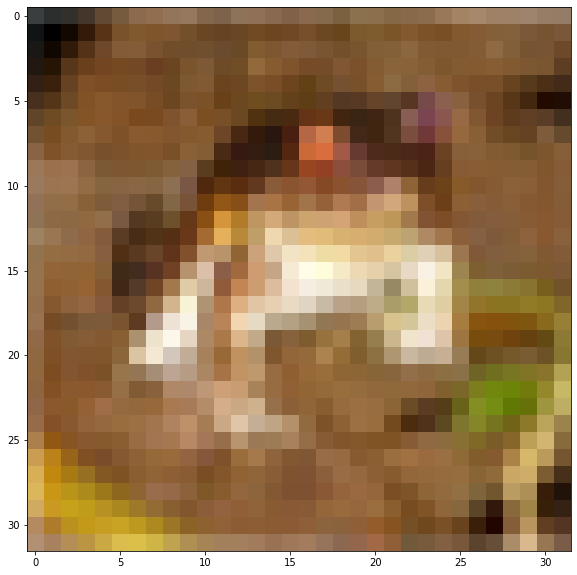

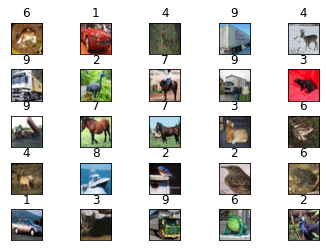

In [100]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.utils import np_utils
from keras.datasets import cifar10
from keras.optimizers import RMSprop

# the data, shuffled and split between train and test sets
# Here we are using the official test set as our validation set, in further
# tutorials, test and validation splits will be explained properly.
# Hence, even though the variables are `x_test` and `y_test`, they represent our validation set
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

print('Image shape: {0}'.format(X_train.shape[1:]))
print('Total number of training samples: {0}'.format(X_train.shape[0]))
print('Total number of validation samples: {0}'.format(X_test.shape[0]))

# Let's visualize some examples
N=5
fig1 = plt.figure(figsize=(10,10))
fig1 = plt.imshow(X_train[0], cmap='gray')
start_val = 0 # pick an element for the code to plot the following N**2 values
fig, axes = plt.subplots(N,N)
items = list(range(0, 10))
for row in range(N):
  for col in range(N):
    idx = start_val+row+N*col
    axes[row,col].imshow(X_train[idx], cmap='gray')
    fig.subplots_adjust(hspace=0.5)
    y_target = int(y_train[idx])
    target = str(items[y_target])
    axes[row,col].set_title(target)
    axes[row,col].set_xticks([])
    axes[row,col].set_yticks([])

CIFAR10 contains 50,000 32x32 color training images, labeled over 10 categories and 10,000 test images. As mentioned, we use those test images as our validation set in this tutorial. We need to preprocess the images for the 1D neural network defined in the previous tutorial:

In [ ]:
# Preprocess dataset for a 1D neural network
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# Normalize the image
X_train /= 255
X_test /= 255

X_train_flatten = X_train.reshape(X_train.shape[0], X_train.shape[1] * X_train.shape[2]*3)
X_test_flatten = X_test.reshape(X_test.shape[0], X_test.shape[1] * X_test.shape[2]*3)

print('New X_train shape: {0}'.format(X_train_flatten.shape))

Y_train_class = np_utils.to_categorical(y_train, 10)
Y_test_class = np_utils.to_categorical(y_test, 10)

print('New Y_train shape: {0}'.format(Y_train_class.shape))


New X_train shape: (50000, 3072)
New Y_train shape: (50000, 10)


Now, we are ready to define the Multi-layer Perceptron model and train it.

In [ ]:
model = Sequential()

model.add(Dense(32, activation='relu', input_shape=(X_train_flatten.shape[1:])))
model.add(Dense(64, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))

# initiate RMSprop optimizer
opt = RMSprop(lr=0.0001, decay=1e-6)

# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

model.fit(X_train_flatten, Y_train_class, batch_size=32, epochs=20)

score = model.evaluate(X_test_flatten, Y_test_class, verbose=0)
print('Validation loss:', score[0])
print('Validation accuracy:', score[1])

Epoch 1/20
1563/1563 [==============================] - 7s 4ms/step - loss: 1.9454 - accuracy: 0.2879
Epoch 2/20
1563/1563 [==============================] - 6s 4ms/step - loss: 1.7721 - accuracy: 0.3567
Epoch 3/20
1563/1563 [==============================] - 6s 4ms/step - loss: 1.6954 - accuracy: 0.3854
Epoch 4/20
1563/1563 [==============================] - 7s 4ms/step - loss: 1.6420 - accuracy: 0.4103
Epoch 5/20
1563/1563 [==============================] - 6s 4ms/step - loss: 1.6014 - accuracy: 0.4253
Epoch 6/20
1563/1563 [==============================] - 6s 4ms/step - loss: 1.5657 - accuracy: 0.4397
Epoch 7/20
1563/1563 [==============================] - 6s 4ms/step - loss: 1.5389 - accuracy: 0.4496
Epoch 8/20
1563/1563 [==============================] - 6s 4ms/step - loss: 1.5119 - accuracy: 0.4586
Epoch 9/20
1563/1563 [==============================] - 6s 4ms/step - loss: 1.4910 - accuracy: 0.4668
Epoch 10/20
1563/1563 [==============================] - 6s 4ms/step - loss: 1.472

### Problem Definition

In this exercise, you are asked to test several CNN architectures in the code provided below. Do not modify the optimizer, loss used or parameters related to the training such as the learning rate, they will be investigated in future tutorials. You must focus on the architecture itself: number of convolutional layers, number of filters in every layer, activation functions, pooling operators, among others. Batch Normalization and Dropout layers, which are quite used in CNN architectures, will be also investigated in a future tutorial so you do not have to discuss them.


**Report**:
*   Present a bar figure with the training and validation accuracies for different design choices. Discuss only the parameters that have a significant influence on the network's performance. Explain any discrepancy between training and validation accuracies.
*   Present a sketch that introduces your best architecture. See some examples on how to display networks in [cv-tricks' blog](https://cv-tricks.com/cnn/understand-resnet-alexnet-vgg-inception/).


**Experiment 1 : Number of layers**
1.   16
2.   16, 32
3.   16, 32, 64
4.   64, 128
5.   64, 128, 256
6.   64
7.   128, 256
8.   128, 256, 512


In [60]:
import tensorflow as tf
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.utils import np_utils
from keras.datasets import cifar10
from keras.optimizers import RMSprop
from keras.layers import Conv2D, MaxPooling2D, Flatten, AveragePooling2D
from google.colab import drive
from keras.models import load_model
drive.mount('/content/drive')

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

print('Image shape: {0}'.format(x_train.shape[1:]))
print('Total number of training samples: {0}'.format(x_train.shape[0]))
print('Total number of validation samples: {0}'.format(x_test.shape[0]))

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
y_train_class = np_utils.to_categorical(y_train, 10)
y_test_class = np_utils.to_categorical(y_test, 10)

model = load_model('/content/drive/MyDrive/dl-cw/layer_4')

opt = RMSprop(lr=0.0001, decay=1e-6)

model.summary()
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
model.fit(x_train, y_train_class, batch_size=32, epochs=20, validation_data=(x_test, y_test_class))

score = model.evaluate(x_test, y_test_class, verbose=0)
print('Validation loss:', score[0])
print('Validation accuracy:', score[1])

model.save('/content/drive/MyDrive/dl-cw/layer_4')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Image shape: (32, 32, 3)
Total number of training samples: 50000
Total number of validation samples: 10000
Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_32 (Conv2D)          (None, 32, 32, 64)        1792      
                                                                 
 activation_32 (Activation)  (None, 32, 32, 64)        0         
                                                                 
 max_pooling2d_32 (MaxPoolin  (None, 16, 16, 64)       0         
 g2D)                                                            
                                                                 
 average_pooling2d_12 (Avera  (None, 8, 8, 64)         0         
 gePooling2D)                                                    
               

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/rmsprop.py:135: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


Epoch 1/20
1563/1563 [==============================] - 9s 5ms/step - loss: 1.0842 - accuracy: 0.6252 - val_loss: 1.1173 - val_accuracy: 0.6054
Epoch 2/20
1563/1563 [==============================] - 9s 6ms/step - loss: 1.0733 - accuracy: 0.6288 - val_loss: 1.1262 - val_accuracy: 0.6081
Epoch 3/20
1563/1563 [==============================] - 9s 6ms/step - loss: 1.0638 - accuracy: 0.6334 - val_loss: 1.0846 - val_accuracy: 0.6234
Epoch 4/20
1563/1563 [==============================] - 7s 5ms/step - loss: 1.0529 - accuracy: 0.6361 - val_loss: 1.0859 - val_accuracy: 0.6269
Epoch 5/20
1563/1563 [==============================] - 8s 5ms/step - loss: 1.0431 - accuracy: 0.6395 - val_loss: 1.0863 - val_accuracy: 0.6225
Epoch 6/20
1563/1563 [==============================] - 10s 6ms/step - loss: 1.0331 - accuracy: 0.6418 - val_loss: 1.0709 - val_accuracy: 0.6333
Epoch 7/20
1563/1563 [==============================] - 9s 6ms/step - loss: 1.0245 - accuracy: 0.6453 - val_loss: 1.0832 - val_accuracy

In [61]:
import tensorflow as tf
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.utils import np_utils
from keras.datasets import cifar10
from keras.optimizers import RMSprop
from keras.layers import Conv2D, MaxPooling2D, Flatten, AveragePooling2D
from google.colab import drive
from keras.models import load_model
drive.mount('/content/drive')

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

print('Image shape: {0}'.format(x_train.shape[1:]))
print('Total number of training samples: {0}'.format(x_train.shape[0]))
print('Total number of validation samples: {0}'.format(x_test.shape[0]))

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
y_train_class = np_utils.to_categorical(y_train, 10)
y_test_class = np_utils.to_categorical(y_test, 10)

model = load_model('/content/drive/MyDrive/dl-cw/layer_5')

opt = RMSprop(lr=0.0001, decay=1e-6)

model.summary()
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
model.fit(x_train, y_train_class, batch_size=32, epochs=20, validation_data=(x_test, y_test_class))

score = model.evaluate(x_test, y_test_class, verbose=0)
print('Validation loss:', score[0])
print('Validation accuracy:', score[1])

model.save('/content/drive/MyDrive/dl-cw/layer_5')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Image shape: (32, 32, 3)
Total number of training samples: 50000
Total number of validation samples: 10000
Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_27 (Conv2D)          (None, 32, 32, 64)        1792      
                                                                 
 activation_27 (Activation)  (None, 32, 32, 64)        0         
                                                                 
 max_pooling2d_27 (MaxPoolin  (None, 16, 16, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_28 (Conv2D)          (None, 16, 16, 128)       73856     
                                                                 
 activation_28 

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/rmsprop.py:135: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


Epoch 1/20
1563/1563 [==============================] - 11s 7ms/step - loss: 0.8969 - accuracy: 0.6878 - val_loss: 0.9344 - val_accuracy: 0.6734
Epoch 2/20
1563/1563 [==============================] - 8s 5ms/step - loss: 0.8833 - accuracy: 0.6930 - val_loss: 0.9639 - val_accuracy: 0.6684
Epoch 3/20
1563/1563 [==============================] - 8s 5ms/step - loss: 0.8708 - accuracy: 0.6972 - val_loss: 0.9021 - val_accuracy: 0.6926
Epoch 4/20
1563/1563 [==============================] - 8s 5ms/step - loss: 0.8579 - accuracy: 0.7050 - val_loss: 0.9008 - val_accuracy: 0.6926
Epoch 5/20
1563/1563 [==============================] - 11s 7ms/step - loss: 0.8456 - accuracy: 0.7084 - val_loss: 0.9277 - val_accuracy: 0.6758
Epoch 6/20
1563/1563 [==============================] - 11s 7ms/step - loss: 0.8345 - accuracy: 0.7102 - val_loss: 0.8941 - val_accuracy: 0.6948
Epoch 7/20
1563/1563 [==============================] - 9s 6ms/step - loss: 0.8235 - accuracy: 0.7163 - val_loss: 0.8931 - val_accura

In [62]:
import tensorflow as tf
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.utils import np_utils
from keras.datasets import cifar10
from keras.optimizers import RMSprop
from keras.layers import Conv2D, MaxPooling2D, Flatten, AveragePooling2D
from google.colab import drive
from keras.models import load_model
drive.mount('/content/drive')

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

print('Image shape: {0}'.format(x_train.shape[1:]))
print('Total number of training samples: {0}'.format(x_train.shape[0]))
print('Total number of validation samples: {0}'.format(x_test.shape[0]))

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
y_train_class = np_utils.to_categorical(y_train, 10)
y_test_class = np_utils.to_categorical(y_test, 10)

model = load_model('/content/drive/MyDrive/dl-cw/layer_6')

opt = RMSprop(lr=0.0001, decay=1e-6)

model.summary()
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
model.fit(x_train, y_train_class, batch_size=32, epochs=20, validation_data=(x_test, y_test_class))

score = model.evaluate(x_test, y_test_class, verbose=0)
print('Validation loss:', score[0])
print('Validation accuracy:', score[1])

model.save('/content/drive/MyDrive/dl-cw/layer_6')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Image shape: (32, 32, 3)
Total number of training samples: 50000
Total number of validation samples: 10000
Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_29 (Conv2D)          (None, 32, 32, 64)        1792      
                                                                 
 activation_29 (Activation)  (None, 32, 32, 64)        0         
                                                                 
 max_pooling2d_29 (MaxPoolin  (None, 16, 16, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_30 (Conv2D)          (None, 16, 16, 128)       73856     
                                                                 
 activation_30 

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/rmsprop.py:135: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


Epoch 1/20
1563/1563 [==============================] - 10s 6ms/step - loss: 0.7044 - accuracy: 0.7588 - val_loss: 0.8112 - val_accuracy: 0.7213
Epoch 2/20
1563/1563 [==============================] - 9s 6ms/step - loss: 0.6849 - accuracy: 0.7659 - val_loss: 0.8666 - val_accuracy: 0.7112
Epoch 3/20
1563/1563 [==============================] - 9s 6ms/step - loss: 0.6671 - accuracy: 0.7713 - val_loss: 0.7576 - val_accuracy: 0.7413
Epoch 4/20
1563/1563 [==============================] - 9s 6ms/step - loss: 0.6481 - accuracy: 0.7789 - val_loss: 0.7650 - val_accuracy: 0.7397
Epoch 5/20
1563/1563 [==============================] - 9s 6ms/step - loss: 0.6319 - accuracy: 0.7847 - val_loss: 0.7751 - val_accuracy: 0.7366
Epoch 6/20
1563/1563 [==============================] - 9s 6ms/step - loss: 0.6156 - accuracy: 0.7882 - val_loss: 0.7859 - val_accuracy: 0.7345
Epoch 7/20
1563/1563 [==============================] - 9s 6ms/step - loss: 0.5989 - accuracy: 0.7957 - val_loss: 0.7609 - val_accuracy

In [64]:
import tensorflow as tf
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.utils import np_utils
from keras.datasets import cifar10
from keras.optimizers import RMSprop
from keras.layers import Conv2D, MaxPooling2D, Flatten, AveragePooling2D
from google.colab import drive
from keras.models import load_model
drive.mount('/content/drive')

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

print('Image shape: {0}'.format(x_train.shape[1:]))
print('Total number of training samples: {0}'.format(x_train.shape[0]))
print('Total number of validation samples: {0}'.format(x_test.shape[0]))

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
y_train_class = np_utils.to_categorical(y_train, 10)
y_test_class = np_utils.to_categorical(y_test, 10)

model = load_model('/content/drive/MyDrive/dl-cw/layer_3')

opt = RMSprop(lr=0.0001, decay=1e-6)

model.summary()
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
model.fit(x_train, y_train_class, batch_size=32, epochs=20, validation_data=(x_test, y_test_class))

score = model.evaluate(x_test, y_test_class, verbose=0)
print('Validation loss:', score[0])
print('Validation accuracy:', score[1])

model.save('/content/drive/MyDrive/dl-cw/layer_3')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Image shape: (32, 32, 3)
Total number of training samples: 50000
Total number of validation samples: 10000
Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 32, 32, 16)        448       
                                                                 
 activation_24 (Activation)  (None, 32, 32, 16)        0         
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 16, 16, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_25 (Conv2D)          (None, 16, 16, 32)        4640      
                                                                 
 activation_25 (

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/rmsprop.py:135: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


Epoch 1/20
1563/1563 [==============================] - 9s 5ms/step - loss: 1.1471 - accuracy: 0.5965 - val_loss: 1.1523 - val_accuracy: 0.5880
Epoch 2/20
1563/1563 [==============================] - 8s 5ms/step - loss: 1.1315 - accuracy: 0.6007 - val_loss: 1.2279 - val_accuracy: 0.5708
Epoch 3/20
1563/1563 [==============================] - 8s 5ms/step - loss: 1.1202 - accuracy: 0.6064 - val_loss: 1.1207 - val_accuracy: 0.6085
Epoch 4/20
1563/1563 [==============================] - 8s 5ms/step - loss: 1.1080 - accuracy: 0.6116 - val_loss: 1.1043 - val_accuracy: 0.6157
Epoch 5/20
1563/1563 [==============================] - 8s 5ms/step - loss: 1.0954 - accuracy: 0.6148 - val_loss: 1.1149 - val_accuracy: 0.6023
Epoch 6/20
1563/1563 [==============================] - 8s 5ms/step - loss: 1.0842 - accuracy: 0.6189 - val_loss: 1.1020 - val_accuracy: 0.6098
Epoch 7/20
1563/1563 [==============================] - 8s 5ms/step - loss: 1.0741 - accuracy: 0.6211 - val_loss: 1.0941 - val_accuracy:

In [63]:
import tensorflow as tf
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.utils import np_utils
from keras.datasets import cifar10
from keras.optimizers import RMSprop
from keras.layers import Conv2D, MaxPooling2D, Flatten, AveragePooling2D
from google.colab import drive
from keras.models import load_model
drive.mount('/content/drive')

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

print('Image shape: {0}'.format(x_train.shape[1:]))
print('Total number of training samples: {0}'.format(x_train.shape[0]))
print('Total number of validation samples: {0}'.format(x_test.shape[0]))

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
y_train_class = np_utils.to_categorical(y_train, 10)
y_test_class = np_utils.to_categorical(y_test, 10)

model = load_model('/content/drive/MyDrive/dl-cw/filter_2')

opt = RMSprop(lr=0.0001, decay=1e-6)

model.summary()
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
model.fit(x_train, y_train_class, batch_size=32, epochs=20, validation_data=(x_test, y_test_class))

score = model.evaluate(x_test, y_test_class, verbose=0)
print('Validation loss:', score[0])
print('Validation accuracy:', score[1])

model.save('/content/drive/MyDrive/dl-cw/filter_2')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Image shape: (32, 32, 3)
Total number of training samples: 50000
Total number of validation samples: 10000
Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_36 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 activation_36 (Activation)  (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d_36 (MaxPoolin  (None, 16, 16, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_37 (Conv2D)          (None, 16, 16, 64)        18496     
                                                                 
 activation_37 

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/rmsprop.py:135: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


Epoch 1/20
1563/1563 [==============================] - 9s 5ms/step - loss: 0.8965 - accuracy: 0.6889 - val_loss: 0.9436 - val_accuracy: 0.6703
Epoch 2/20
1563/1563 [==============================] - 8s 5ms/step - loss: 0.8792 - accuracy: 0.6947 - val_loss: 1.0421 - val_accuracy: 0.6429
Epoch 3/20
1563/1563 [==============================] - 8s 5ms/step - loss: 0.8657 - accuracy: 0.6995 - val_loss: 0.8954 - val_accuracy: 0.6897
Epoch 4/20
1563/1563 [==============================] - 8s 5ms/step - loss: 0.8507 - accuracy: 0.7045 - val_loss: 0.8729 - val_accuracy: 0.7048
Epoch 5/20
1563/1563 [==============================] - 8s 5ms/step - loss: 0.8369 - accuracy: 0.7090 - val_loss: 0.9189 - val_accuracy: 0.6794
Epoch 6/20
1563/1563 [==============================] - 8s 5ms/step - loss: 0.8235 - accuracy: 0.7147 - val_loss: 0.8832 - val_accuracy: 0.7003
Epoch 7/20
1563/1563 [==============================] - 8s 5ms/step - loss: 0.8114 - accuracy: 0.7176 - val_loss: 0.8726 - val_accuracy:

In [65]:
import tensorflow as tf
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.utils import np_utils
from keras.datasets import cifar10
from keras.optimizers import RMSprop
from keras.layers import Conv2D, MaxPooling2D, Flatten, AveragePooling2D
from google.colab import drive
from keras.models import load_model
drive.mount('/content/drive')

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

print('Image shape: {0}'.format(x_train.shape[1:]))
print('Total number of training samples: {0}'.format(x_train.shape[0]))
print('Total number of validation samples: {0}'.format(x_test.shape[0]))

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
y_train_class = np_utils.to_categorical(y_train, 10)
y_test_class = np_utils.to_categorical(y_test, 10)

model = load_model('/content/drive/MyDrive/dl-cw/filter_4')

opt = RMSprop(lr=0.0001, decay=1e-6)

model.summary()
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
model.fit(x_train, y_train_class, batch_size=32, epochs=20, validation_data=(x_test, y_test_class))

score = model.evaluate(x_test, y_test_class, verbose=0)
print('Validation loss:', score[0])
print('Validation accuracy:', score[1])

model.save('/content/drive/MyDrive/dl-cw/filter_4')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Image shape: (32, 32, 3)
Total number of training samples: 50000
Total number of validation samples: 10000
Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_33 (Conv2D)          (None, 32, 32, 128)       3584      
                                                                 
 activation_33 (Activation)  (None, 32, 32, 128)       0         
                                                                 
 max_pooling2d_33 (MaxPoolin  (None, 16, 16, 128)      0         
 g2D)                                                            
                                                                 
 conv2d_34 (Conv2D)          (None, 16, 16, 256)       295168    
                                                                 
 activation_34 

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/rmsprop.py:135: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


Epoch 1/20
1563/1563 [==============================] - 16s 10ms/step - loss: 0.3833 - accuracy: 0.8706 - val_loss: 0.7180 - val_accuracy: 0.7696
Epoch 2/20
1563/1563 [==============================] - 15s 10ms/step - loss: 0.3569 - accuracy: 0.8806 - val_loss: 0.7385 - val_accuracy: 0.7711
Epoch 3/20
1563/1563 [==============================] - 15s 10ms/step - loss: 0.3309 - accuracy: 0.8890 - val_loss: 0.7082 - val_accuracy: 0.7769
Epoch 4/20
1563/1563 [==============================] - 15s 10ms/step - loss: 0.3041 - accuracy: 0.8985 - val_loss: 0.6967 - val_accuracy: 0.7792
Epoch 5/20
1563/1563 [==============================] - 15s 10ms/step - loss: 0.2795 - accuracy: 0.9075 - val_loss: 0.7766 - val_accuracy: 0.7644
Epoch 6/20
1563/1563 [==============================] - 15s 10ms/step - loss: 0.2569 - accuracy: 0.9137 - val_loss: 0.7523 - val_accuracy: 0.7754
Epoch 7/20
1563/1563 [==============================] - 15s 10ms/step - loss: 0.2340 - accuracy: 0.9232 - val_loss: 0.8273 -

In [66]:
import tensorflow as tf
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.utils import np_utils
from keras.datasets import cifar10
from keras.optimizers import RMSprop
from keras.layers import Conv2D, MaxPooling2D, Flatten, AveragePooling2D
from google.colab import drive
from keras.models import load_model
drive.mount('/content/drive')

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

print('Image shape: {0}'.format(x_train.shape[1:]))
print('Total number of training samples: {0}'.format(x_train.shape[0]))
print('Total number of validation samples: {0}'.format(x_test.shape[0]))

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
y_train_class = np_utils.to_categorical(y_train, 10)
y_test_class = np_utils.to_categorical(y_test, 10)

model = load_model('/content/drive/MyDrive/dl-cw/dense_3')

opt = RMSprop(lr=0.0001, decay=1e-6)

model.summary()
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
model.fit(x_train, y_train_class, batch_size=32, epochs=20, validation_data=(x_test, y_test_class))

score = model.evaluate(x_test, y_test_class, verbose=0)
print('Validation loss:', score[0])
print('Validation accuracy:', score[1])

model.save('/content/drive/MyDrive/dl-cw/dense_3')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Image shape: (32, 32, 3)
Total number of training samples: 50000
Total number of validation samples: 10000
Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_45 (Conv2D)          (None, 32, 32, 128)       3584      
                                                                 
 activation_45 (Activation)  (None, 32, 32, 128)       0         
                                                                 
 max_pooling2d_45 (MaxPoolin  (None, 16, 16, 128)      0         
 g2D)                                                            
                                                                 
 conv2d_46 (Conv2D)          (None, 16, 16, 256)       295168    
                                                                 
 activation_46 

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/rmsprop.py:135: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


Epoch 1/20
1563/1563 [==============================] - 16s 10ms/step - loss: 0.2464 - accuracy: 0.9175 - val_loss: 0.6979 - val_accuracy: 0.7899
Epoch 2/20
1563/1563 [==============================] - 15s 10ms/step - loss: 0.2174 - accuracy: 0.9279 - val_loss: 0.7243 - val_accuracy: 0.7896
Epoch 3/20
1563/1563 [==============================] - 15s 10ms/step - loss: 0.1913 - accuracy: 0.9375 - val_loss: 0.7833 - val_accuracy: 0.7832
Epoch 4/20
1563/1563 [==============================] - 15s 10ms/step - loss: 0.1634 - accuracy: 0.9474 - val_loss: 0.8079 - val_accuracy: 0.7862
Epoch 5/20
1563/1563 [==============================] - 15s 10ms/step - loss: 0.1451 - accuracy: 0.9522 - val_loss: 0.8437 - val_accuracy: 0.7846
Epoch 6/20
1563/1563 [==============================] - 16s 10ms/step - loss: 0.1237 - accuracy: 0.9609 - val_loss: 0.8546 - val_accuracy: 0.7809
Epoch 7/20
1563/1563 [==============================] - 15s 10ms/step - loss: 0.1052 - accuracy: 0.9670 - val_loss: 0.9456 -

In [67]:
import tensorflow as tf
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.utils import np_utils
from keras.datasets import cifar10
from keras.optimizers import RMSprop
from keras.layers import Conv2D, MaxPooling2D, Flatten, AveragePooling2D
from google.colab import drive
from keras.models import load_model
drive.mount('/content/drive')

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

print('Image shape: {0}'.format(x_train.shape[1:]))
print('Total number of training samples: {0}'.format(x_train.shape[0]))
print('Total number of validation samples: {0}'.format(x_test.shape[0]))

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
y_train_class = np_utils.to_categorical(y_train, 10)
y_test_class = np_utils.to_categorical(y_test, 10)

model = load_model('/content/drive/MyDrive/dl-cw/dense_4')

opt = RMSprop(lr=0.0001, decay=1e-6)

model.summary()
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
model.fit(x_train, y_train_class, batch_size=32, epochs=20, validation_data=(x_test, y_test_class))

score = model.evaluate(x_test, y_test_class, verbose=0)
print('Validation loss:', score[0])
print('Validation accuracy:', score[1])

model.save('/content/drive/MyDrive/dl-cw/dense_4')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Image shape: (32, 32, 3)
Total number of training samples: 50000
Total number of validation samples: 10000
Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_48 (Conv2D)          (None, 32, 32, 128)       3584      
                                                                 
 activation_48 (Activation)  (None, 32, 32, 128)       0         
                                                                 
 max_pooling2d_48 (MaxPoolin  (None, 16, 16, 128)      0         
 g2D)                                                            
                                                                 
 conv2d_49 (Conv2D)          (None, 16, 16, 256)       295168    
                                                                 
 activation_49 

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/rmsprop.py:135: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


Epoch 1/20
1563/1563 [==============================] - 16s 10ms/step - loss: 0.1916 - accuracy: 0.9364 - val_loss: 0.8042 - val_accuracy: 0.7780
Epoch 2/20
1563/1563 [==============================] - 17s 11ms/step - loss: 0.1634 - accuracy: 0.9462 - val_loss: 0.8868 - val_accuracy: 0.7714
Epoch 3/20
1563/1563 [==============================] - 15s 10ms/step - loss: 0.1405 - accuracy: 0.9543 - val_loss: 0.8409 - val_accuracy: 0.7872
Epoch 4/20
1563/1563 [==============================] - 15s 10ms/step - loss: 0.1181 - accuracy: 0.9606 - val_loss: 0.9585 - val_accuracy: 0.7712
Epoch 5/20
1563/1563 [==============================] - 15s 10ms/step - loss: 0.1023 - accuracy: 0.9667 - val_loss: 0.9791 - val_accuracy: 0.7796
Epoch 6/20
1563/1563 [==============================] - 15s 10ms/step - loss: 0.0852 - accuracy: 0.9732 - val_loss: 1.0214 - val_accuracy: 0.7753
Epoch 7/20
1563/1563 [==============================] - 15s 10ms/step - loss: 0.0728 - accuracy: 0.9765 - val_loss: 0.9554 -

In [68]:
import tensorflow as tf
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.utils import np_utils
from keras.datasets import cifar10
from keras.optimizers import RMSprop
from keras.layers import Conv2D, MaxPooling2D, Flatten, AveragePooling2D
from google.colab import drive
from keras.models import load_model
drive.mount('/content/drive')

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

print('Image shape: {0}'.format(x_train.shape[1:]))
print('Total number of training samples: {0}'.format(x_train.shape[0]))
print('Total number of validation samples: {0}'.format(x_test.shape[0]))

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
y_train_class = np_utils.to_categorical(y_train, 10)
y_test_class = np_utils.to_categorical(y_test, 10)

model = load_model('/content/drive/MyDrive/dl-cw/dense_5')

opt = RMSprop(lr=0.0001, decay=1e-6)

model.summary()
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
model.fit(x_train, y_train_class, batch_size=32, epochs=20, validation_data=(x_test, y_test_class))

score = model.evaluate(x_test, y_test_class, verbose=0)
print('Validation loss:', score[0])
print('Validation accuracy:', score[1])

model.save('/content/drive/MyDrive/dl-cw/dense_5')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Image shape: (32, 32, 3)
Total number of training samples: 50000
Total number of validation samples: 10000
Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 32, 32, 128)       3584      
                                                                 
 activation_15 (Activation)  (None, 32, 32, 128)       0         
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 16, 16, 128)      0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 16, 16, 256)       295168    
                                                                 
 activation_16 (

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/rmsprop.py:135: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


Epoch 1/20
1563/1563 [==============================] - 16s 10ms/step - loss: 0.4108 - accuracy: 0.8592 - val_loss: 0.7682 - val_accuracy: 0.7497
Epoch 2/20
1563/1563 [==============================] - 15s 10ms/step - loss: 0.3825 - accuracy: 0.8696 - val_loss: 0.7072 - val_accuracy: 0.7735
Epoch 3/20
1563/1563 [==============================] - 15s 10ms/step - loss: 0.3544 - accuracy: 0.8799 - val_loss: 0.7098 - val_accuracy: 0.7773
Epoch 4/20
1563/1563 [==============================] - 15s 10ms/step - loss: 0.3270 - accuracy: 0.8867 - val_loss: 0.7054 - val_accuracy: 0.7813
Epoch 5/20
1563/1563 [==============================] - 15s 10ms/step - loss: 0.3031 - accuracy: 0.8980 - val_loss: 0.7698 - val_accuracy: 0.7686
Epoch 6/20
1563/1563 [==============================] - 15s 10ms/step - loss: 0.2770 - accuracy: 0.9049 - val_loss: 0.7747 - val_accuracy: 0.7740
Epoch 7/20
1563/1563 [==============================] - 15s 10ms/step - loss: 0.2511 - accuracy: 0.9157 - val_loss: 0.7725 -

In [69]:
import tensorflow as tf
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.utils import np_utils
from keras.datasets import cifar10
from keras.optimizers import RMSprop
from keras.layers import Conv2D, MaxPooling2D, Flatten, AveragePooling2D
from google.colab import drive
from keras.models import load_model
drive.mount('/content/drive')

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

print('Image shape: {0}'.format(x_train.shape[1:]))
print('Total number of training samples: {0}'.format(x_train.shape[0]))
print('Total number of validation samples: {0}'.format(x_test.shape[0]))

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
y_train_class = np_utils.to_categorical(y_train, 10)
y_test_class = np_utils.to_categorical(y_test, 10)

model = load_model('/content/drive/MyDrive/dl-cw/dense_6')

opt = RMSprop(lr=0.0001, decay=1e-6)

model.summary()
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
model.fit(x_train, y_train_class, batch_size=32, epochs=20, validation_data=(x_test, y_test_class))

score = model.evaluate(x_test, y_test_class, verbose=0)
print('Validation loss:', score[0])
print('Validation accuracy:', score[1])

model.save('/content/drive/MyDrive/dl-cw/dense_6')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Image shape: (32, 32, 3)
Total number of training samples: 50000
Total number of validation samples: 10000
Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 32, 32, 128)       3584      
                                                                 
 activation_18 (Activation)  (None, 32, 32, 128)       0         
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 16, 16, 128)      0         
 g2D)                                                            
                                                                 
 conv2d_19 (Conv2D)          (None, 16, 16, 256)       295168    
                                                                 
 activation_19 (

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/rmsprop.py:135: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


Epoch 1/20
1563/1563 [==============================] - 16s 10ms/step - loss: 0.3140 - accuracy: 0.8916 - val_loss: 0.7242 - val_accuracy: 0.7750
Epoch 2/20
1563/1563 [==============================] - 17s 11ms/step - loss: 0.2833 - accuracy: 0.9047 - val_loss: 0.7614 - val_accuracy: 0.7727
Epoch 3/20
1563/1563 [==============================] - 16s 10ms/step - loss: 0.2569 - accuracy: 0.9123 - val_loss: 0.7014 - val_accuracy: 0.7908
Epoch 4/20
1563/1563 [==============================] - 15s 10ms/step - loss: 0.2273 - accuracy: 0.9237 - val_loss: 0.7487 - val_accuracy: 0.7860
Epoch 5/20
1563/1563 [==============================] - 15s 10ms/step - loss: 0.2029 - accuracy: 0.9317 - val_loss: 0.8554 - val_accuracy: 0.7702
Epoch 6/20
1563/1563 [==============================] - 15s 10ms/step - loss: 0.1800 - accuracy: 0.9405 - val_loss: 0.9089 - val_accuracy: 0.7672
Epoch 7/20
1563/1563 [==============================] - 15s 10ms/step - loss: 0.1559 - accuracy: 0.9479 - val_loss: 0.8418 -

In [70]:
import tensorflow as tf
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.utils import np_utils
from keras.datasets import cifar10
from keras.optimizers import RMSprop
from keras.layers import Conv2D, MaxPooling2D, Flatten, AveragePooling2D
from google.colab import drive
from keras.models import load_model
drive.mount('/content/drive')

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

print('Image shape: {0}'.format(x_train.shape[1:]))
print('Total number of training samples: {0}'.format(x_train.shape[0]))
print('Total number of validation samples: {0}'.format(x_test.shape[0]))

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
y_train_class = np_utils.to_categorical(y_train, 10)
y_test_class = np_utils.to_categorical(y_test, 10)

model = load_model('/content/drive/MyDrive/dl-cw/pool_2')

opt = RMSprop(lr=0.0001, decay=1e-6)

model.summary()
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
model.fit(x_train, y_train_class, batch_size=32, epochs=20, validation_data=(x_test, y_test_class))

score = model.evaluate(x_test, y_test_class, verbose=0)
print('Validation loss:', score[0])
print('Validation accuracy:', score[1])

model.save('/content/drive/MyDrive/dl-cw/pool_2')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Image shape: (32, 32, 3)
Total number of training samples: 50000
Total number of validation samples: 10000
Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_57 (Conv2D)          (None, 32, 32, 128)       3584      
                                                                 
 activation_57 (Activation)  (None, 32, 32, 128)       0         
                                                                 
 max_pooling2d_55 (MaxPoolin  (None, 16, 16, 128)      0         
 g2D)                                                            
                                                                 
 conv2d_58 (Conv2D)          (None, 16, 16, 256)       295168    
                                                                 
 activation_58 

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/rmsprop.py:135: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


Epoch 1/20
1563/1563 [==============================] - 16s 10ms/step - loss: 0.2122 - accuracy: 0.9297 - val_loss: 0.9757 - val_accuracy: 0.7392
Epoch 2/20
1563/1563 [==============================] - 15s 10ms/step - loss: 0.1838 - accuracy: 0.9383 - val_loss: 1.0187 - val_accuracy: 0.7436
Epoch 3/20
1563/1563 [==============================] - 15s 10ms/step - loss: 0.1577 - accuracy: 0.9469 - val_loss: 1.1080 - val_accuracy: 0.7334
Epoch 4/20
1563/1563 [==============================] - 16s 10ms/step - loss: 0.1324 - accuracy: 0.9564 - val_loss: 1.0918 - val_accuracy: 0.7452
Epoch 5/20
1563/1563 [==============================] - 16s 10ms/step - loss: 0.1121 - accuracy: 0.9626 - val_loss: 1.1109 - val_accuracy: 0.7512
Epoch 6/20
1563/1563 [==============================] - 15s 10ms/step - loss: 0.0965 - accuracy: 0.9685 - val_loss: 1.2960 - val_accuracy: 0.7267
Epoch 7/20
1563/1563 [==============================] - 15s 10ms/step - loss: 0.0814 - accuracy: 0.9745 - val_loss: 1.1708 -

In [71]:
import tensorflow as tf
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.utils import np_utils
from keras.datasets import cifar10
from keras.optimizers import RMSprop
from keras.layers import Conv2D, MaxPooling2D, Flatten, AveragePooling2D
from google.colab import drive
from keras.models import load_model
drive.mount('/content/drive')

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

print('Image shape: {0}'.format(x_train.shape[1:]))
print('Total number of training samples: {0}'.format(x_train.shape[0]))
print('Total number of validation samples: {0}'.format(x_test.shape[0]))

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
y_train_class = np_utils.to_categorical(y_train, 10)
y_test_class = np_utils.to_categorical(y_test, 10)

model = load_model('/content/drive/MyDrive/dl-cw/pool_3')

opt = RMSprop(lr=0.0001, decay=1e-6)

model.summary()
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
model.fit(x_train, y_train_class, batch_size=32, epochs=20, validation_data=(x_test, y_test_class))

score = model.evaluate(x_test, y_test_class, verbose=0)
print('Validation loss:', score[0])
print('Validation accuracy:', score[1])

model.save('/content/drive/MyDrive/dl-cw/pool_3')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Image shape: (32, 32, 3)
Total number of training samples: 50000
Total number of validation samples: 10000
Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_60 (Conv2D)          (None, 32, 32, 128)       3584      
                                                                 
 activation_60 (Activation)  (None, 32, 32, 128)       0         
                                                                 
 average_pooling2d_23 (Avera  (None, 16, 16, 128)      0         
 gePooling2D)                                                    
                                                                 
 conv2d_61 (Conv2D)          (None, 16, 16, 256)       295168    
                                                                 
 activation_61 

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/rmsprop.py:135: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


Epoch 1/20
1563/1563 [==============================] - 16s 10ms/step - loss: 0.7530 - accuracy: 0.7363 - val_loss: 0.8655 - val_accuracy: 0.6943
Epoch 2/20
1563/1563 [==============================] - 15s 10ms/step - loss: 0.7308 - accuracy: 0.7465 - val_loss: 0.9773 - val_accuracy: 0.6693
Epoch 3/20
1563/1563 [==============================] - 15s 10ms/step - loss: 0.7121 - accuracy: 0.7529 - val_loss: 0.8278 - val_accuracy: 0.7138
Epoch 4/20
1563/1563 [==============================] - 15s 10ms/step - loss: 0.6908 - accuracy: 0.7579 - val_loss: 0.7689 - val_accuracy: 0.7303
Epoch 5/20
1563/1563 [==============================] - 15s 10ms/step - loss: 0.6740 - accuracy: 0.7655 - val_loss: 0.8092 - val_accuracy: 0.7140
Epoch 6/20
1563/1563 [==============================] - 15s 10ms/step - loss: 0.6555 - accuracy: 0.7720 - val_loss: 0.7744 - val_accuracy: 0.7321
Epoch 7/20
1563/1563 [==============================] - 15s 10ms/step - loss: 0.6393 - accuracy: 0.7784 - val_loss: 0.7884 -

In [72]:
import tensorflow as tf
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.utils import np_utils
from keras.datasets import cifar10
from keras.optimizers import RMSprop
from keras.layers import Conv2D, MaxPooling2D, Flatten, AveragePooling2D
from google.colab import drive
from keras.models import load_model
drive.mount('/content/drive')

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

print('Image shape: {0}'.format(x_train.shape[1:]))
print('Total number of training samples: {0}'.format(x_train.shape[0]))
print('Total number of validation samples: {0}'.format(x_test.shape[0]))

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
y_train_class = np_utils.to_categorical(y_train, 10)
y_test_class = np_utils.to_categorical(y_test, 10)

model = load_model('/content/drive/MyDrive/dl-cw/pool_4')

opt = RMSprop(lr=0.0001, decay=1e-6)

model.summary()
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
model.fit(x_train, y_train_class, batch_size=32, epochs=20, validation_data=(x_test, y_test_class))

score = model.evaluate(x_test, y_test_class, verbose=0)
print('Validation loss:', score[0])
print('Validation accuracy:', score[1])

model.save('/content/drive/MyDrive/dl-cw/pool_4')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Image shape: (32, 32, 3)
Total number of training samples: 50000
Total number of validation samples: 10000
Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_63 (Conv2D)          (None, 30, 30, 128)       3584      
                                                                 
 activation_63 (Activation)  (None, 30, 30, 128)       0         
                                                                 
 conv2d_64 (Conv2D)          (None, 28, 28, 256)       295168    
                                                                 
 activation_64 (Activation)  (None, 28, 28, 256)       0         
                                                                 
 conv2d_65 (Conv2D)          (None, 26, 26, 512)       1180160   
               

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/rmsprop.py:135: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


Epoch 1/20
1563/1563 [==============================] - 61s 38ms/step - loss: 0.0240 - accuracy: 0.9917 - val_loss: 2.5273 - val_accuracy: 0.7068
Epoch 2/20
1563/1563 [==============================] - 59s 38ms/step - loss: 0.0237 - accuracy: 0.9922 - val_loss: 2.7345 - val_accuracy: 0.6944
Epoch 3/20
1563/1563 [==============================] - 60s 39ms/step - loss: 0.0206 - accuracy: 0.9934 - val_loss: 2.9229 - val_accuracy: 0.6924
Epoch 4/20
1563/1563 [==============================] - 60s 38ms/step - loss: 0.0209 - accuracy: 0.9927 - val_loss: 2.8488 - val_accuracy: 0.7020
Epoch 5/20
1563/1563 [==============================] - 60s 38ms/step - loss: 0.0199 - accuracy: 0.9934 - val_loss: 2.7750 - val_accuracy: 0.7047
Epoch 6/20
1563/1563 [==============================] - 58s 37ms/step - loss: 0.0186 - accuracy: 0.9936 - val_loss: 2.9243 - val_accuracy: 0.7010
Epoch 7/20
1563/1563 [==============================] - 60s 38ms/step - loss: 0.0197 - accuracy: 0.9937 - val_loss: 2.9031 -

In [73]:
import tensorflow as tf
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.utils import np_utils
from keras.datasets import cifar10
from keras.optimizers import RMSprop
from keras.layers import Conv2D, MaxPooling2D, Flatten, AveragePooling2D
from google.colab import drive
from keras.models import load_model
drive.mount('/content/drive')

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

print('Image shape: {0}'.format(x_train.shape[1:]))
print('Total number of training samples: {0}'.format(x_train.shape[0]))
print('Total number of validation samples: {0}'.format(x_test.shape[0]))

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
y_train_class = np_utils.to_categorical(y_train, 10)
y_test_class = np_utils.to_categorical(y_test, 10)

model = load_model('/content/drive/MyDrive/dl-cw/act_2')

opt = RMSprop(lr=0.0001, decay=1e-6)

model.summary()
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
model.fit(x_train, y_train_class, batch_size=32, epochs=20, validation_data=(x_test, y_test_class))

score = model.evaluate(x_test, y_test_class, verbose=0)
print('Validation loss:', score[0])
print('Validation accuracy:', score[1])

model.save('/content/drive/MyDrive/dl-cw/act_2')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Image shape: (32, 32, 3)
Total number of training samples: 50000
Total number of validation samples: 10000
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 32, 32, 128)       3584      
                                                                 
 activation_3 (Activation)   (None, 32, 32, 128)       0         
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 16, 16, 128)      0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 16, 16, 256)       295168    
                                                                 
 activation_4 (A

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/rmsprop.py:135: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


Epoch 1/20
1563/1563 [==============================] - 16s 10ms/step - loss: 1.5342 - accuracy: 0.4412 - val_loss: 1.5178 - val_accuracy: 0.4480
Epoch 2/20
1563/1563 [==============================] - 15s 10ms/step - loss: 1.5150 - accuracy: 0.4478 - val_loss: 1.5946 - val_accuracy: 0.4271
Epoch 3/20
1563/1563 [==============================] - 15s 10ms/step - loss: 1.4971 - accuracy: 0.4533 - val_loss: 1.6172 - val_accuracy: 0.4329
Epoch 4/20
1563/1563 [==============================] - 16s 10ms/step - loss: 1.4782 - accuracy: 0.4611 - val_loss: 1.5147 - val_accuracy: 0.4567
Epoch 5/20
1563/1563 [==============================] - 16s 10ms/step - loss: 1.4600 - accuracy: 0.4699 - val_loss: 1.4946 - val_accuracy: 0.4576
Epoch 6/20
1563/1563 [==============================] - 15s 10ms/step - loss: 1.4442 - accuracy: 0.4759 - val_loss: 1.4443 - val_accuracy: 0.4756
Epoch 7/20
1563/1563 [==============================] - 15s 10ms/step - loss: 1.4292 - accuracy: 0.4839 - val_loss: 1.4209 -

In [74]:
import tensorflow as tf
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.utils import np_utils
from keras.datasets import cifar10
from keras.optimizers import RMSprop
from keras.layers import Conv2D, MaxPooling2D, Flatten, AveragePooling2D
from google.colab import drive
from keras.models import load_model
drive.mount('/content/drive')

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

print('Image shape: {0}'.format(x_train.shape[1:]))
print('Total number of training samples: {0}'.format(x_train.shape[0]))
print('Total number of validation samples: {0}'.format(x_test.shape[0]))

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
y_train_class = np_utils.to_categorical(y_train, 10)
y_test_class = np_utils.to_categorical(y_test, 10)

model = load_model('/content/drive/MyDrive/dl-cw/act_3')

opt = RMSprop(lr=0.0001, decay=1e-6)

model.summary()
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
model.fit(x_train, y_train_class, batch_size=32, epochs=20, validation_data=(x_test, y_test_class))

score = model.evaluate(x_test, y_test_class, verbose=0)
print('Validation loss:', score[0])
print('Validation accuracy:', score[1])

model.save('/content/drive/MyDrive/dl-cw/act_3')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Image shape: (32, 32, 3)
Total number of training samples: 50000
Total number of validation samples: 10000
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 32, 32, 128)       3584      
                                                                 
 activation_6 (Activation)   (None, 32, 32, 128)       0         
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 16, 16, 128)      0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 16, 16, 256)       295168    
                                                                 
 activation_7 (A

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/rmsprop.py:135: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


Epoch 1/20
1563/1563 [==============================] - 16s 10ms/step - loss: 0.2415 - accuracy: 0.9176 - val_loss: 0.8427 - val_accuracy: 0.7631
Epoch 2/20
1563/1563 [==============================] - 15s 10ms/step - loss: 0.2124 - accuracy: 0.9291 - val_loss: 0.9005 - val_accuracy: 0.7578
Epoch 3/20
1563/1563 [==============================] - 15s 10ms/step - loss: 0.1866 - accuracy: 0.9385 - val_loss: 0.9112 - val_accuracy: 0.7660
Epoch 4/20
1563/1563 [==============================] - 15s 10ms/step - loss: 0.1601 - accuracy: 0.9478 - val_loss: 0.9944 - val_accuracy: 0.7568
Epoch 5/20
1563/1563 [==============================] - 15s 10ms/step - loss: 0.1373 - accuracy: 0.9547 - val_loss: 1.0479 - val_accuracy: 0.7545
Epoch 6/20
1563/1563 [==============================] - 15s 10ms/step - loss: 0.1185 - accuracy: 0.9613 - val_loss: 1.0895 - val_accuracy: 0.7520
Epoch 7/20
1563/1563 [==============================] - 15s 10ms/step - loss: 0.1019 - accuracy: 0.9661 - val_loss: 1.1496 -

In [75]:
import tensorflow as tf
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.utils import np_utils
from keras.datasets import cifar10
from keras.optimizers import RMSprop
from keras.layers import Conv2D, MaxPooling2D, Flatten, AveragePooling2D
from google.colab import drive
from keras.models import load_model
drive.mount('/content/drive')

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

print('Image shape: {0}'.format(x_train.shape[1:]))
print('Total number of training samples: {0}'.format(x_train.shape[0]))
print('Total number of validation samples: {0}'.format(x_test.shape[0]))

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
y_train_class = np_utils.to_categorical(y_train, 10)
y_test_class = np_utils.to_categorical(y_test, 10)

model = load_model('/content/drive/MyDrive/dl-cw/act_4')

opt = RMSprop(lr=0.0001, decay=1e-6)

model.summary()
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
model.fit(x_train, y_train_class, batch_size=32, epochs=20, validation_data=(x_test, y_test_class))

score = model.evaluate(x_test, y_test_class, verbose=0)
print('Validation loss:', score[0])
print('Validation accuracy:', score[1])

model.save('/content/drive/MyDrive/dl-cw/act_4')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Image shape: (32, 32, 3)
Total number of training samples: 50000
Total number of validation samples: 10000
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 32, 32, 128)       3584      
                                                                 
 activation_12 (Activation)  (None, 32, 32, 128)       0         
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 16, 16, 128)      0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 16, 16, 256)       295168    
                                                                 
 activation_13 (

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/rmsprop.py:135: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


Epoch 1/20
1563/1563 [==============================] - 16s 10ms/step - loss: 0.1024 - accuracy: 0.9663 - val_loss: 1.2533 - val_accuracy: 0.7188
Epoch 2/20
1563/1563 [==============================] - 15s 10ms/step - loss: 0.0864 - accuracy: 0.9722 - val_loss: 1.3729 - val_accuracy: 0.7136
Epoch 3/20
1563/1563 [==============================] - 15s 10ms/step - loss: 0.0752 - accuracy: 0.9754 - val_loss: 1.3919 - val_accuracy: 0.7174
Epoch 4/20
1563/1563 [==============================] - 15s 10ms/step - loss: 0.0655 - accuracy: 0.9791 - val_loss: 1.3841 - val_accuracy: 0.7277
Epoch 5/20
1563/1563 [==============================] - 15s 10ms/step - loss: 0.0599 - accuracy: 0.9808 - val_loss: 1.4706 - val_accuracy: 0.7275
Epoch 6/20
1563/1563 [==============================] - 15s 10ms/step - loss: 0.0537 - accuracy: 0.9824 - val_loss: 1.5452 - val_accuracy: 0.7244
Epoch 7/20
1563/1563 [==============================] - 15s 10ms/step - loss: 0.0504 - accuracy: 0.9839 - val_loss: 1.4786 -

**Experiment 2: How many feature maps?**
1.   16, 32, 64
2.   32, 64, 128
3.   64, 128, 256
4.   128, 256, 512
5.   256, 512, 1024



Experiment 3: How large a dense layer?
1.   128
2.   256
3.   512
4.   512, 256



**Experiment 4: Pooling**
1.   Max Pooling w/ Average Pooling
2.   Max Pooling w/o Average Pooling
3.   Average Pooling
4.   No pooling



**Experiment 5: Activation functions**
1.   relu
2.   sigmoid
3.   elu
4.   selu



**Fine Tuning**

In [93]:
import tensorflow as tf
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.utils import np_utils
from keras.datasets import cifar10
from keras.optimizers import RMSprop
from keras.layers import Conv2D, MaxPooling2D, Flatten, AveragePooling2D
from google.colab import drive
drive.mount('/content/drive')

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

print('Image shape: {0}'.format(x_train.shape[1:]))
print('Total number of training samples: {0}'.format(x_train.shape[0]))
print('Total number of validation samples: {0}'.format(x_test.shape[0]))

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
y_train_class = np_utils.to_categorical(y_train, 10)
y_test_class = np_utils.to_categorical(y_test, 10)

model = Sequential()
model.add(Conv2D(128, (3,3), padding='same', input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(256, (3,3), padding='same', input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(320, (3,3), padding='same', input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(AveragePooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dense(10, activation='softmax'))

opt = RMSprop(lr=0.0001, decay=1e-6)

model.summary()
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
model.fit(x_train, y_train_class, batch_size=32, epochs=20, validation_data=(x_test, y_test_class))

score = model.evaluate(x_test, y_test_class, verbose=0)
print('Validation loss:', score[0])
print('Validation accuracy:', score[1])

model.save('/content/drive/MyDrive/dl-cw/fine_tune3')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
170498071/170498071 [==============================] - 3s 0us/step
Image shape: (32, 32, 3)
Total number of training samples: 50000
Total number of validation samples: 10000
Model: "sequential_40"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_78 (Conv2D)          (None, 32, 32, 128)       3584      
                                                                 
 activation_78 (Activation)  (None, 32, 32, 128)       0         
                                                                 
 max_pooling2d_43 (MaxPoolin  (None, 16, 16, 128)      0         
 g2D)                                                            
                                                                 
 conv2d_79 (Conv2D)          (None, 16, 16, 256)       295168    
              

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/rmsprop.py:135: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


Epoch 1/20
1563/1563 [==============================] - 16s 9ms/step - loss: 1.7797 - accuracy: 0.3483 - val_loss: 1.5666 - val_accuracy: 0.4242
Epoch 2/20
1563/1563 [==============================] - 13s 8ms/step - loss: 1.4624 - accuracy: 0.4715 - val_loss: 1.5085 - val_accuracy: 0.4745
Epoch 3/20
1563/1563 [==============================] - 13s 8ms/step - loss: 1.3159 - accuracy: 0.5310 - val_loss: 1.2697 - val_accuracy: 0.5534
Epoch 4/20
1563/1563 [==============================] - 14s 9ms/step - loss: 1.1955 - accuracy: 0.5776 - val_loss: 1.1123 - val_accuracy: 0.6146
Epoch 5/20
1563/1563 [==============================] - 13s 8ms/step - loss: 1.0956 - accuracy: 0.6164 - val_loss: 1.1322 - val_accuracy: 0.5891
Epoch 6/20
1563/1563 [==============================] - 14s 9ms/step - loss: 1.0198 - accuracy: 0.6446 - val_loss: 1.0354 - val_accuracy: 0.6424
Epoch 7/20
1563/1563 [==============================] - 13s 8ms/step - loss: 0.9587 - accuracy: 0.6645 - val_loss: 0.9963 - val_ac

In [105]:
import tensorflow as tf
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.utils import np_utils
from keras.datasets import cifar10
from keras.optimizers import RMSprop
from keras.layers import Conv2D, MaxPooling2D, Flatten, AveragePooling2D
from google.colab import drive
drive.mount('/content/drive')

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

print('Image shape: {0}'.format(x_train.shape[1:]))
print('Total number of training samples: {0}'.format(x_train.shape[0]))
print('Total number of validation samples: {0}'.format(x_test.shape[0]))

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
y_train_class = np_utils.to_categorical(y_train, 10)
y_test_class = np_utils.to_categorical(y_test, 10)

model = Sequential()
model.add(Conv2D(128, (3,3), padding='same', input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(256, (3,3), padding='same', input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(320, (3,3), padding='same', input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(AveragePooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(320, activation='relu'))
model.add(Dense(10, activation='softmax'))

opt = RMSprop(lr=0.0001, decay=1e-6)

model.summary()
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
model.fit(x_train, y_train_class, batch_size=32, epochs=20, validation_data=(x_test, y_test_class))

score = model.evaluate(x_test, y_test_class, verbose=0)
print('Validation loss:', score[0])
print('Validation accuracy:', score[1])

model.save('/content/drive/MyDrive/dl-cw/fine_tune3')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Image shape: (32, 32, 3)
Total number of training samples: 50000
Total number of validation samples: 10000
Model: "sequential_42"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_90 (Conv2D)          (None, 32, 32, 128)       3584      
                                                                 
 activation_23 (Activation)  (None, 32, 32, 128)       0         
                                                                 
 max_pooling2d_89 (MaxPoolin  (None, 16, 16, 128)      0         
 g2D)                                                            
                                                                 
 conv2d_91 (Conv2D)          (None, 16, 16, 256)       295168    
                                                                 
 activation_24 

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/rmsprop.py:135: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


Epoch 1/20
1563/1563 [==============================] - 14s 9ms/step - loss: 1.7026 - accuracy: 0.3813 - val_loss: 1.4727 - val_accuracy: 0.4584
Epoch 2/20
1563/1563 [==============================] - 13s 9ms/step - loss: 1.3584 - accuracy: 0.5109 - val_loss: 1.4075 - val_accuracy: 0.5007
Epoch 3/20
1563/1563 [==============================] - 14s 9ms/step - loss: 1.1771 - accuracy: 0.5823 - val_loss: 1.1053 - val_accuracy: 0.6162
Epoch 4/20
1563/1563 [==============================] - 14s 9ms/step - loss: 1.0526 - accuracy: 0.6302 - val_loss: 0.9943 - val_accuracy: 0.6549
Epoch 5/20
1563/1563 [==============================] - 14s 9ms/step - loss: 0.9621 - accuracy: 0.6644 - val_loss: 1.0151 - val_accuracy: 0.6364
Epoch 6/20
1563/1563 [==============================] - 13s 9ms/step - loss: 0.8894 - accuracy: 0.6915 - val_loss: 0.9150 - val_accuracy: 0.6838
Epoch 7/20
1563/1563 [==============================] - 13s 9ms/step - loss: 0.8276 - accuracy: 0.7128 - val_loss: 0.8679 - val_ac

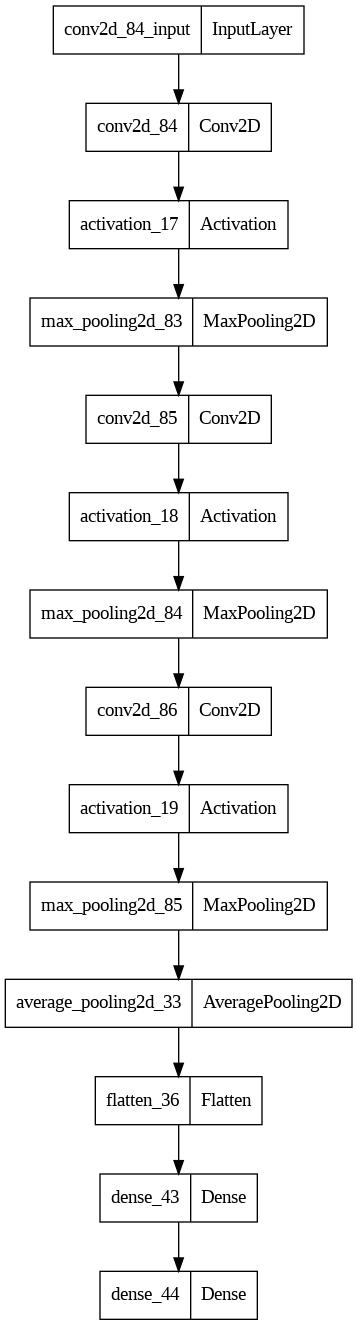

In [114]:
from keras.utils import plot_model
import numpy as np
from tensorflow.keras.models import load_model

model = load_model('/content/drive/MyDrive/dl-cw/fine_tune2')
plot_model(model, to_file='model.png')

In [115]:
# !pip install keras_sequential_ascii
# !pip install git+git://github.com/stared/keras-sequential-ascii.git

from keras_sequential_ascii import keras2ascii
keras2ascii(model)

           OPERATION           DATA DIMENSIONS   WEIGHTS(N)   WEIGHTS(%)

               Input   #####     32   32    3
              Conv2D    \|/  -------------------      3584     0.3%
                relu   #####     32   32  128
        MaxPooling2D   Y max -------------------         0     0.0%
                       #####     16   16  128
              Conv2D    \|/  -------------------    184480    17.4%
                relu   #####     16   16  160
        MaxPooling2D   Y max -------------------         0     0.0%
                       #####      8    8  160
              Conv2D    \|/  -------------------    461120    43.4%
                relu   #####      8    8  320
        MaxPooling2D   Y max -------------------         0     0.0%
                       #####      4    4  320
    AveragePooling2D   Y avg -------------------         0     0.0%
                       #####      2    2  320
             Flatten   ||||| -------------------         0     0.0%
              


---
---

## Task 2: Regression

Now we face a regression task instead of a classification problem. Loss function, activations, and dataset will change in the following task. Thus, instead of having one vector with the probabilities of each class, in this regression problem, the output is a single scalar. 

For this second task, we chose the task of estimating house prices based on input images. To get the data run the following script, which clones Ahmed and Moustafa’s [repository](https://github.com/emanhamed/Houses-dataset) into colmap.

In [2]:
!git clone https://github.com/emanhamed/Houses-dataset
%cd /content/Houses-dataset/Houses\ Dataset

Cloning into 'Houses-dataset'...
remote: Enumerating objects: 2166, done.
remote: Counting objects: 100% (1/1), done.
remote: Total 2166 (delta 0), reused 0 (delta 0), pack-reused 2165
Receiving objects: 100% (2166/2166), 176.26 MiB | 45.89 MiB/s, done.
Resolving deltas: 100% (20/20), done.
/content/Houses-dataset/Houses Dataset


This dataset contains four images of the house (kitchen, frontal, bedroom and bathroom), and attributes (number of bedrooms, number of bathrooms, zip code...). For our exercise, we only use the images of the house. We start with front door images. 

We have selected kitchen images. You can switch to the kitchen, frontal, bedroom or bathroom images by changing house_section variable.


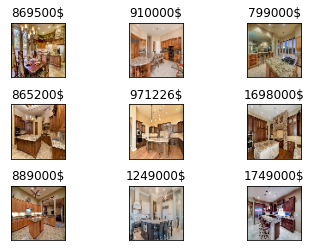

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import seed

house_section = 'kitchen' # select between: kitchen, frontal, bedroom or bathroom
print('We have selected {} images. You can switch to the kitchen, frontal, bedroom or bathroom images by changing house_section variable.'.format(house_section))
images = []
for i_im in range(1, 536):
  image = cv2.imread(str(i_im)+'_'+house_section+'.jpg')
  image = cv2.resize(image, (64, 64))
  images.append(image)

labels = []
f = open('HousesInfo.txt', "r")
for x in f:
  label = (x).split(' ')[-1].split('\n')[0]
  labels.append(label)

# Let's visualize some examples
N=3
start_val = 0 # pick an element for the code to plot the following N**2 values
fig, axes = plt.subplots(N,N)
for row in range(N):
  for col in range(N):
    idx = start_val+row+N*col    
    tmp = cv2.cvtColor(images[idx],cv2.COLOR_BGR2RGB)
    axes[row,col].imshow(tmp, cmap='gray')
    fig.subplots_adjust(hspace=0.5)
    target = int(labels[idx])
    axes[row,col].set_title(str(target) + '$')
    axes[row,col].set_xticks([])
    axes[row,col].set_yticks([])

Prepare the dataset for training the model:

In [4]:
seed(1234)
images = np.asarray(images).astype('float32')
labels = np.asarray(labels).astype('float32')

# Normalize the image
max_price = labels.max()
images /= 255.
labels /= max_price

random_idx = np.random.permutation(len(images))
images = images[random_idx]
labels = labels[random_idx]

split_size_val = int(0.8*len(images))
X_train, X_val = images[:split_size_val], images[split_size_val+1:]
Y_train, Y_val = labels[:split_size_val], labels[split_size_val+1:]

# Print shape of training and val images 
print('X_train image shape: {0}'.format(X_train.shape))
print('X_val image shape: {0}'.format(X_val.shape))

# Print shape of training and val labels 
print('Y_train labels shape: {0}'.format(Y_train.shape))
print('Y_val labels shape: {0}'.format(Y_val.shape))

X_train image shape: (428, 64, 64, 3)
X_val image shape: (106, 64, 64, 3)
Y_train labels shape: (428,)
Y_val labels shape: (106,)


### Problem Definition

Similar to the previous task, you are asked to design a CNN architecture able to perform the estimation of house prices based on the `frontal` house image. Design a new model by changing parameters such as the number of convolutional layers, activation functions, strides, or pooling operators, among others.

In [61]:
import tensorflow as tf
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.utils import np_utils
from keras.optimizers import Adam
from keras.layers import Conv2D, MaxPooling2D, Flatten, AveragePooling2D
tf.random.set_seed(1234)
from google.colab import drive
drive.mount('/content/drive')

chanDim = -1
model = Sequential()

# . . . 

model.add(Conv2D(32, (3,3), padding='same', strides=1, input_shape=X_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(AveragePooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(1))
# . . . 

model.summary()
opt = Adam(lr=1e-3, decay=1e-3 / 200)

model.compile(loss="mean_absolute_percentage_error", optimizer=opt, metrics=['mean_absolute_percentage_error'])

# train the model
print("[INFO] training model...")
history_layer1 = model.fit(X_train, Y_train, validation_data=(X_val, Y_val), epochs=100, batch_size=32)

prices_predicted = model.predict(X_val).flatten()
print(model.predict(X_val).shape)
print(Y_val.shape)
diff = ((prices_predicted - Y_val) / Y_val) * 100
error_mean = np.mean(np.abs(diff))

print("Estimation Error: {:.2f}%".format(error_mean))

model.save('/content/drive/MyDrive/dl-cw/regression/layer_1')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_41 (Conv2D)          (None, 64, 64, 32)        896       
                                                                 
 activation_41 (Activation)  (None, 64, 64, 32)        0         
                                                                 
 max_pooling2d_32 (MaxPoolin  (None, 32, 32, 32)       0         
 g2D)                                                            
                                                                 
 average_pooling2d_20 (Avera  (None, 16, 16, 32)       0         
 gePooling2D)                                                    
                                                                 
 flatten_20 (Flatten)        (None, 8192)              0

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


14/14 [==============================] - 1s 44ms/step - loss: 530.7127 - mean_absolute_percentage_error: 530.7127 - val_loss: 190.2742 - val_mean_absolute_percentage_error: 190.2742
Epoch 2/100
14/14 [==============================] - 0s 7ms/step - loss: 152.5988 - mean_absolute_percentage_error: 152.5988 - val_loss: 120.2286 - val_mean_absolute_percentage_error: 120.2286
Epoch 3/100
14/14 [==============================] - 0s 7ms/step - loss: 96.7911 - mean_absolute_percentage_error: 96.7911 - val_loss: 55.7012 - val_mean_absolute_percentage_error: 55.7012
Epoch 4/100
14/14 [==============================] - 0s 7ms/step - loss: 75.2018 - mean_absolute_percentage_error: 75.2018 - val_loss: 51.0575 - val_mean_absolute_percentage_error: 51.0575
Epoch 5/100
14/14 [==============================] - 0s 7ms/step - loss: 72.3818 - mean_absolute_percentage_error: 72.3818 - val_loss: 52.3987 - val_mean_absolute_percentage_error: 52.3987
Epoch 6/100
14/14 [==============================] - 0s 7m

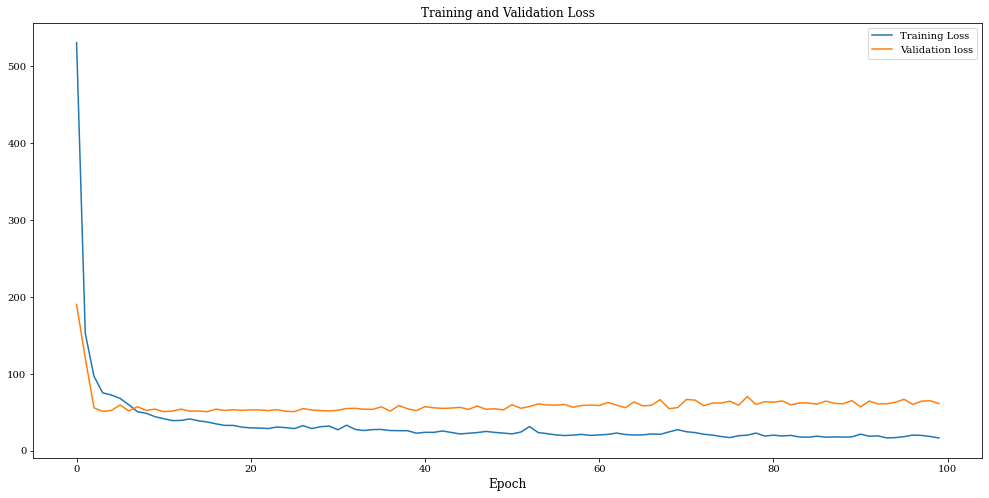

In [11]:
fig = plt.figure(figsize=(17,8))
plt.plot(history_layer1.history['loss'], label='Training Loss')
# axes[0].set_ylabel('Mean Absolute Percentage Error')
plt.xlabel('Epoch', fontsize=12)
plt.yticks(fontsize=10)
plt.xticks(fontsize=10)

plt.plot(history_layer1.history['val_mean_absolute_percentage_error'], label='Validation loss')
plt.title('Training and Validation Loss')
plt.legend()
# fig.title('Mean Absolute Percentage Error Loss')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_39 (Conv2D)          (None, 64, 64, 32)        896       
                                                                 
 activation_39 (Activation)  (None, 64, 64, 32)        0         
                                                                 
 max_pooling2d_30 (MaxPoolin  (None, 32, 32, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_40 (Conv2D)          (None, 32, 32, 64)        18496     
                                                                 
 activation_40 (Activation)  (None, 32, 32, 64)        0         
                                                        

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


14/14 [==============================] - 1s 19ms/step - loss: 234.1398 - mean_absolute_percentage_error: 234.1398 - val_loss: 95.1447 - val_mean_absolute_percentage_error: 95.1447
Epoch 2/100
14/14 [==============================] - 0s 9ms/step - loss: 76.2249 - mean_absolute_percentage_error: 76.2249 - val_loss: 67.3062 - val_mean_absolute_percentage_error: 67.3062
Epoch 3/100
14/14 [==============================] - 0s 8ms/step - loss: 65.6511 - mean_absolute_percentage_error: 65.6511 - val_loss: 57.2105 - val_mean_absolute_percentage_error: 57.2105
Epoch 4/100
14/14 [==============================] - 0s 9ms/step - loss: 60.3651 - mean_absolute_percentage_error: 60.3651 - val_loss: 54.6069 - val_mean_absolute_percentage_error: 54.6069
Epoch 5/100
14/14 [==============================] - 0s 9ms/step - loss: 55.3767 - mean_absolute_percentage_error: 55.3767 - val_loss: 53.8490 - val_mean_absolute_percentage_error: 53.8490
Epoch 6/100
14/14 [==============================] - 0s 9ms/step

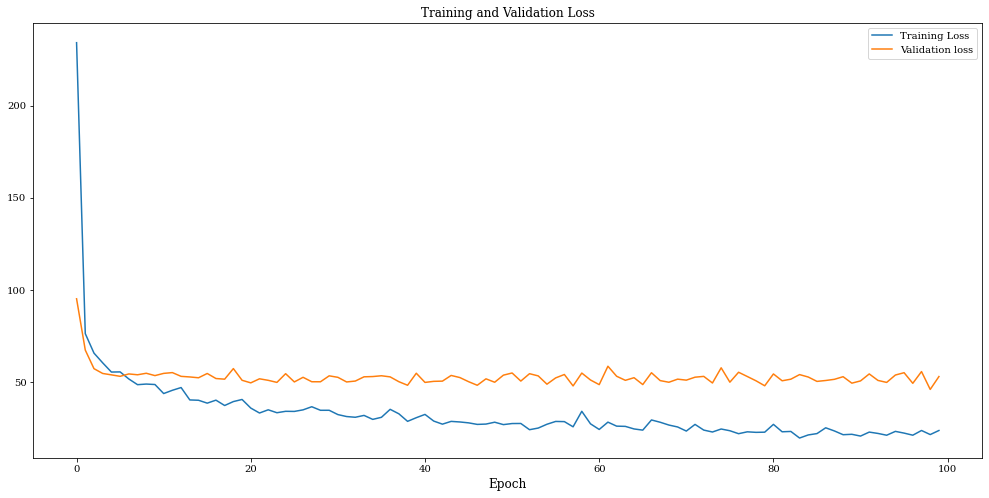

In [60]:
import tensorflow as tf
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.utils import np_utils
from keras.optimizers import Adam
from keras.layers import Conv2D, MaxPooling2D, Flatten, AveragePooling2D
tf.random.set_seed(1234)
from google.colab import drive
drive.mount('/content/drive')

chanDim = -1
model = Sequential()

# . . . 

model.add(Conv2D(32, (3,3), padding='same', strides=1, input_shape=X_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64, (3,3), padding='same', strides=1, input_shape=X_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(AveragePooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(1))
# . . . 

model.summary()
opt = Adam(lr=1e-3, decay=1e-3 / 200)

model.compile(loss="mean_absolute_percentage_error", optimizer=opt, metrics=['mean_absolute_percentage_error'])

# train the model
print("[INFO] training model...")
history_layer2 = model.fit(X_train, Y_train, validation_data=(X_val, Y_val), epochs=100, batch_size=32)

prices_predicted = model.predict(X_val).flatten()
print(model.predict(X_val).shape)
print(Y_val.shape)
diff = ((prices_predicted - Y_val) / Y_val) * 100
error_mean = np.mean(np.abs(diff))

print("Estimation Error: {:.2f}%".format(error_mean))

model.save('/content/drive/MyDrive/dl-cw/regression/layer_2')

fig = plt.figure(figsize=(17,8))
plt.plot(history_layer2.history['loss'], label='Training Loss')
# axes[0].set_ylabel('Mean Absolute Percentage Error')
plt.xlabel('Epoch', fontsize=12)
plt.yticks(fontsize=10)
plt.xticks(fontsize=10)

plt.plot(history_layer2.history['val_mean_absolute_percentage_error'], label='Validation loss')
plt.title('Training and Validation Loss')
plt.legend()
# fig.title('Mean Absolute Percentage Error Loss')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_36 (Conv2D)          (None, 64, 64, 32)        896       
                                                                 
 activation_36 (Activation)  (None, 64, 64, 32)        0         
                                                                 
 max_pooling2d_27 (MaxPoolin  (None, 32, 32, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_37 (Conv2D)          (None, 32, 32, 64)        18496     
                                                                 
 activation_37 (Activation)  (None, 32, 32, 64)        0         
                                                        

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


14/14 [==============================] - 1s 32ms/step - loss: 189.9246 - mean_absolute_percentage_error: 189.9246 - val_loss: 58.5502 - val_mean_absolute_percentage_error: 58.5502
Epoch 2/100
14/14 [==============================] - 0s 9ms/step - loss: 64.6611 - mean_absolute_percentage_error: 64.6611 - val_loss: 57.2936 - val_mean_absolute_percentage_error: 57.2936
Epoch 3/100
14/14 [==============================] - 0s 9ms/step - loss: 61.1617 - mean_absolute_percentage_error: 61.1617 - val_loss: 56.4679 - val_mean_absolute_percentage_error: 56.4679
Epoch 4/100
14/14 [==============================] - 0s 8ms/step - loss: 61.4727 - mean_absolute_percentage_error: 61.4727 - val_loss: 55.6259 - val_mean_absolute_percentage_error: 55.6259
Epoch 5/100
14/14 [==============================] - 0s 10ms/step - loss: 57.9374 - mean_absolute_percentage_error: 57.9374 - val_loss: 55.1797 - val_mean_absolute_percentage_error: 55.1797
Epoch 6/100
14/14 [==============================] - 0s 9ms/ste

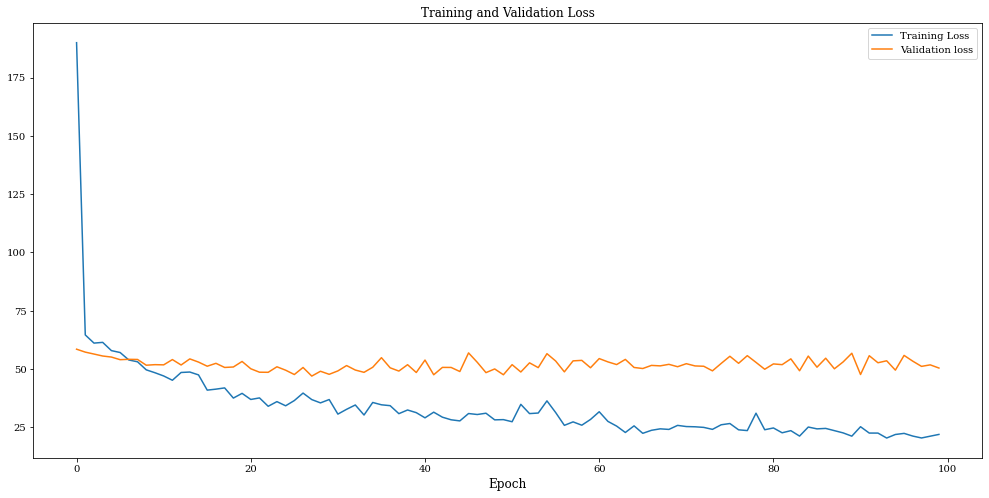

In [59]:
import tensorflow as tf
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.utils import np_utils
from keras.optimizers import Adam
from keras.layers import Conv2D, MaxPooling2D, Flatten, AveragePooling2D
tf.random.set_seed(1234)
from google.colab import drive
drive.mount('/content/drive')

chanDim = -1
model = Sequential()

# . . . 

model.add(Conv2D(32, (3,3), padding='same', strides=1, input_shape=X_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64, (3,3), padding='same', strides=1, input_shape=X_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(128, (3,3), padding='same', strides=1, input_shape=X_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(AveragePooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(1))
# . . . 

model.summary()
opt = Adam(lr=1e-3, decay=1e-3 / 200)

model.compile(loss="mean_absolute_percentage_error", optimizer=opt, metrics=['mean_absolute_percentage_error'])

# train the model
print("[INFO] training model...")
history_layer3 = model.fit(X_train, Y_train, validation_data=(X_val, Y_val), epochs=100, batch_size=32)

prices_predicted = model.predict(X_val).flatten()
print(model.predict(X_val).shape)
print(Y_val.shape)
diff = ((prices_predicted - Y_val) / Y_val) * 100
error_mean = np.mean(np.abs(diff))

print("Estimation Error: {:.2f}%".format(error_mean))

model.save('/content/drive/MyDrive/dl-cw/regression/layer_3')

fig = plt.figure(figsize=(17,8))
plt.plot(history_layer3.history['loss'], label='Training Loss')
# axes[0].set_ylabel('Mean Absolute Percentage Error')
plt.xlabel('Epoch', fontsize=12)
plt.yticks(fontsize=10)
plt.xticks(fontsize=10)

plt.plot(history_layer3.history['val_mean_absolute_percentage_error'], label='Validation loss')
plt.title('Training and Validation Loss')
plt.legend()
# fig.title('Mean Absolute Percentage Error Loss')

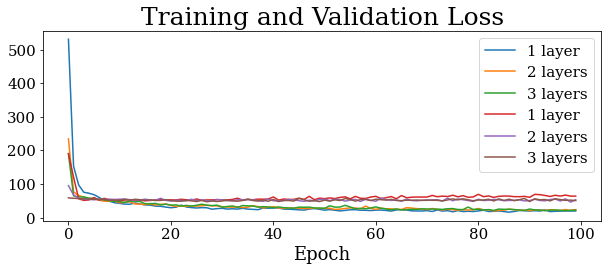

In [116]:
fig = plt.figure(figsize=(10,3.5))
plt.plot(history_layer1.history['loss'], label='1 layer')
plt.plot(history_layer2.history['loss'], label='2 layers')
plt.plot(history_layer3.history['loss'], label='3 layers')
# axes[0].set_ylabel('Mean Absolute Percentage Error')
plt.xlabel('Epoch', fontsize=18)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)

plt.plot(history_layer1.history['val_loss'], label='1 layer')
plt.plot(history_layer2.history['val_loss'], label='2 layers')
plt.plot(history_layer3.history['val_loss'], label='3 layers')
plt.title('Training and Validation Loss', fontsize=25)
plt.legend(fontsize = 15)
# fig.title('Mean Absolute Percentage Error Loss')

fig.savefig('/content/drive/MyDrive/dl-cw/regression/layers.png')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Model: "sequential_32"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_62 (Conv2D)          (None, 64, 64, 16)        448       
                                                                 
 activation_62 (Activation)  (None, 64, 64, 16)        0         
                                                                 
 max_pooling2d_39 (MaxPoolin  (None, 32, 32, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_63 (Conv2D)          (None, 32, 32, 32)        4640      
                                                                 
 activation_63 (Activation)  (None, 32, 32, 32)        0         
                                                        

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


14/14 [==============================] - 1s 17ms/step - loss: 171.5651 - mean_absolute_percentage_error: 171.5651 - val_loss: 83.3875 - val_mean_absolute_percentage_error: 83.3875
Epoch 2/100
14/14 [==============================] - 0s 7ms/step - loss: 87.7846 - mean_absolute_percentage_error: 87.7846 - val_loss: 76.4528 - val_mean_absolute_percentage_error: 76.4528
Epoch 3/100
14/14 [==============================] - 0s 8ms/step - loss: 87.6567 - mean_absolute_percentage_error: 87.6567 - val_loss: 73.3842 - val_mean_absolute_percentage_error: 73.3842
Epoch 4/100
14/14 [==============================] - 0s 8ms/step - loss: 71.9737 - mean_absolute_percentage_error: 71.9737 - val_loss: 67.9843 - val_mean_absolute_percentage_error: 67.9843
Epoch 5/100
14/14 [==============================] - 0s 9ms/step - loss: 66.8439 - mean_absolute_percentage_error: 66.8439 - val_loss: 66.1177 - val_mean_absolute_percentage_error: 66.1177
Epoch 6/100
14/14 [==============================] - 0s 7ms/step

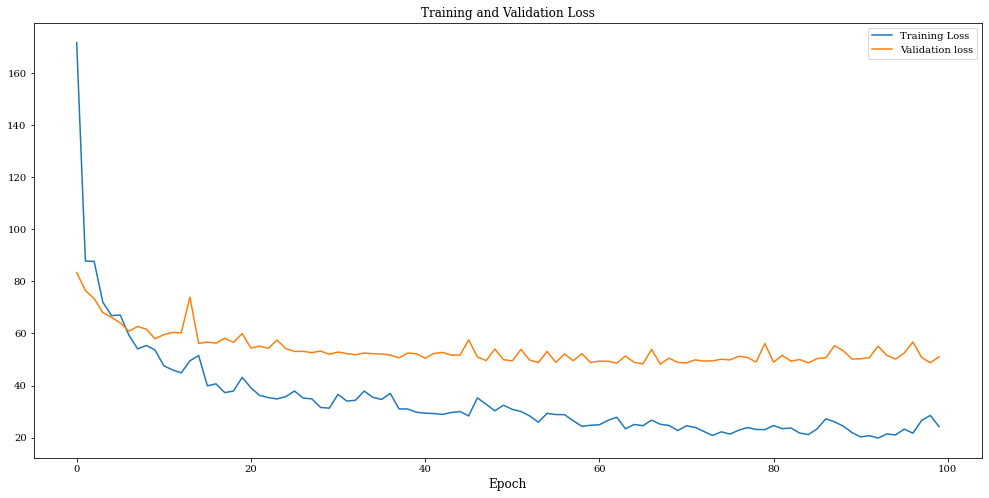

In [73]:
import tensorflow as tf
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.utils import np_utils
from keras.optimizers import Adam
from keras.layers import Conv2D, MaxPooling2D, Flatten, AveragePooling2D
tf.random.set_seed(1234)
from google.colab import drive
drive.mount('/content/drive')

chanDim = -1
model = Sequential()

# . . . 

model.add(Conv2D(16, (3,3), padding='same', strides=1, input_shape=X_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(32, (3,3), padding='same', strides=1, input_shape=X_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(AveragePooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(1))
# . . . 

model.summary()
opt = Adam(lr=1e-3, decay=1e-3 / 200)

model.compile(loss="mean_absolute_percentage_error", optimizer=opt, metrics=['mean_absolute_percentage_error'])

# train the model
print("[INFO] training model...")
history_filter1 = model.fit(X_train, Y_train, validation_data=(X_val, Y_val), epochs=100, batch_size=32)

prices_predicted = model.predict(X_val).flatten()
print(model.predict(X_val).shape)
print(Y_val.shape)
diff = ((prices_predicted - Y_val) / Y_val) * 100
error_mean = np.mean(np.abs(diff))

print("Estimation Error: {:.2f}%".format(error_mean))

model.save('/content/drive/MyDrive/dl-cw/regression/filter_1')

fig = plt.figure(figsize=(17,8))
plt.plot(history_filter1.history['loss'], label='Training Loss')
# axes[0].set_ylabel('Mean Absolute Percentage Error')
plt.xlabel('Epoch', fontsize=12)
plt.yticks(fontsize=10)
plt.xticks(fontsize=10)

plt.plot(history_filter1.history['val_mean_absolute_percentage_error'], label='Validation loss')
plt.title('Training and Validation Loss')
plt.legend()
# fig.title('Mean Absolute Percentage Error Loss')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Model: "sequential_33"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_64 (Conv2D)          (None, 64, 64, 8)         224       
                                                                 
 activation_64 (Activation)  (None, 64, 64, 8)         0         
                                                                 
 max_pooling2d_41 (MaxPoolin  (None, 32, 32, 8)        0         
 g2D)                                                            
                                                                 
 conv2d_65 (Conv2D)          (None, 32, 32, 16)        1168      
                                                                 
 activation_65 (Activation)  (None, 32, 32, 16)        0         
                                                        

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


14/14 [==============================] - 1s 25ms/step - loss: 337.8939 - mean_absolute_percentage_error: 337.8939 - val_loss: 126.0322 - val_mean_absolute_percentage_error: 126.0322
Epoch 2/100
14/14 [==============================] - 0s 7ms/step - loss: 182.1337 - mean_absolute_percentage_error: 182.1337 - val_loss: 106.8954 - val_mean_absolute_percentage_error: 106.8954
Epoch 3/100
14/14 [==============================] - 0s 7ms/step - loss: 122.2056 - mean_absolute_percentage_error: 122.2056 - val_loss: 82.0893 - val_mean_absolute_percentage_error: 82.0893
Epoch 4/100
14/14 [==============================] - 0s 7ms/step - loss: 97.7134 - mean_absolute_percentage_error: 97.7134 - val_loss: 94.0955 - val_mean_absolute_percentage_error: 94.0955
Epoch 5/100
14/14 [==============================] - 0s 7ms/step - loss: 96.7548 - mean_absolute_percentage_error: 96.7548 - val_loss: 81.6455 - val_mean_absolute_percentage_error: 81.6455
Epoch 6/100
14/14 [==============================] - 0s 

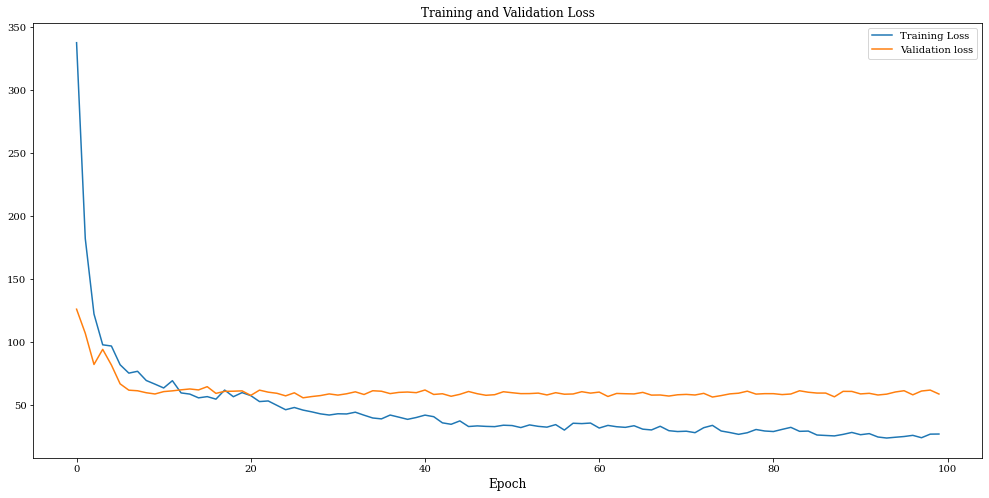

In [74]:
import tensorflow as tf
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.utils import np_utils
from keras.optimizers import Adam
from keras.layers import Conv2D, MaxPooling2D, Flatten, AveragePooling2D
tf.random.set_seed(1234)
from google.colab import drive
drive.mount('/content/drive')

chanDim = -1
model = Sequential()

# . . . 

model.add(Conv2D(8, (3,3), padding='same', strides=1, input_shape=X_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(16, (3,3), padding='same', strides=1, input_shape=X_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(AveragePooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(1))
# . . . 

model.summary()
opt = Adam(lr=1e-3, decay=1e-3 / 200)

model.compile(loss="mean_absolute_percentage_error", optimizer=opt, metrics=['mean_absolute_percentage_error'])

# train the model
print("[INFO] training model...")
history_filter2 = model.fit(X_train, Y_train, validation_data=(X_val, Y_val), epochs=100, batch_size=32)

prices_predicted = model.predict(X_val).flatten()
print(model.predict(X_val).shape)
print(Y_val.shape)
diff = ((prices_predicted - Y_val) / Y_val) * 100
error_mean = np.mean(np.abs(diff))

print("Estimation Error: {:.2f}%".format(error_mean))

model.save('/content/drive/MyDrive/dl-cw/regression/filter_2')

fig = plt.figure(figsize=(17,8))
plt.plot(history_filter2.history['loss'], label='Training Loss')
# axes[0].set_ylabel('Mean Absolute Percentage Error')
plt.xlabel('Epoch', fontsize=12)
plt.yticks(fontsize=10)
plt.xticks(fontsize=10)

plt.plot(history_filter2.history['val_mean_absolute_percentage_error'], label='Validation loss')
plt.title('Training and Validation Loss')
plt.legend()
# fig.title('Mean Absolute Percentage Error Loss')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 16)        448       
                                                                 
 activation (Activation)     (None, 64, 64, 16)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 16)        2320      
                                                                 
 activation_1 (Activation)   (None, 32, 32, 16)        0         
                                                         

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


14/14 [==============================] - 9s 28ms/step - loss: 209.1474 - mean_absolute_percentage_error: 209.1474 - val_loss: 117.9296 - val_mean_absolute_percentage_error: 117.9296
Epoch 2/100
14/14 [==============================] - 0s 6ms/step - loss: 112.3904 - mean_absolute_percentage_error: 112.3904 - val_loss: 88.2665 - val_mean_absolute_percentage_error: 88.2665
Epoch 3/100
14/14 [==============================] - 0s 6ms/step - loss: 89.6531 - mean_absolute_percentage_error: 89.6531 - val_loss: 76.9208 - val_mean_absolute_percentage_error: 76.9208
Epoch 4/100
14/14 [==============================] - 0s 7ms/step - loss: 76.1628 - mean_absolute_percentage_error: 76.1628 - val_loss: 64.1077 - val_mean_absolute_percentage_error: 64.1077
Epoch 5/100
14/14 [==============================] - 0s 7ms/step - loss: 74.1770 - mean_absolute_percentage_error: 74.1770 - val_loss: 65.3914 - val_mean_absolute_percentage_error: 65.3914
Epoch 6/100
14/14 [==============================] - 0s 7ms/

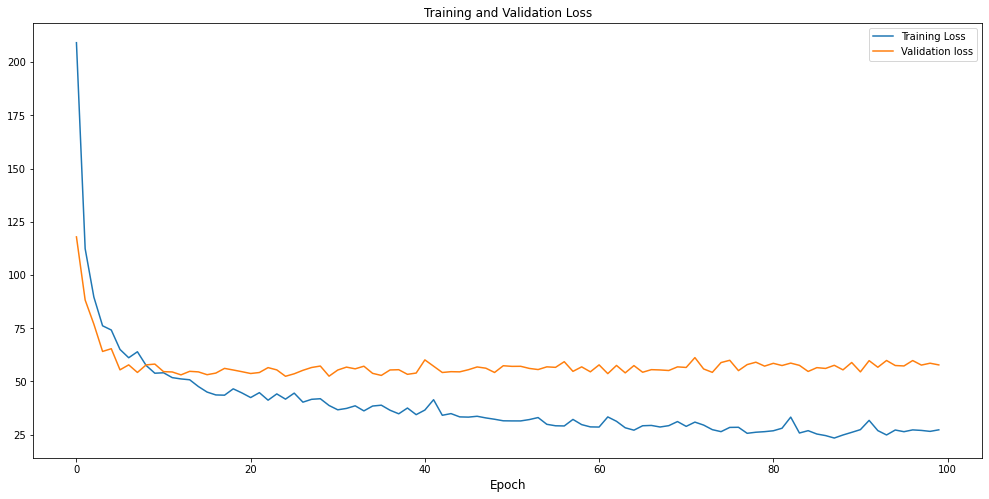

In [6]:
import tensorflow as tf
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.utils import np_utils
from keras.optimizers import Adam
from keras.layers import Conv2D, MaxPooling2D, Flatten, AveragePooling2D
tf.random.set_seed(1234)
from google.colab import drive
drive.mount('/content/drive')

chanDim = -1
model = Sequential()

# . . . 

model.add(Conv2D(16, (3,3), padding='same', strides=1, input_shape=X_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(16, (3,3), padding='same', strides=1, input_shape=X_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(AveragePooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(1))
# . . . 

model.summary()
opt = Adam(lr=1e-3, decay=1e-3 / 200)

model.compile(loss="mean_absolute_percentage_error", optimizer=opt, metrics=['mean_absolute_percentage_error'])

# train the model
print("[INFO] training model...")
history_filter3 = model.fit(X_train, Y_train, validation_data=(X_val, Y_val), epochs=100, batch_size=32)

prices_predicted = model.predict(X_val).flatten()
print(model.predict(X_val).shape)
print(Y_val.shape)
diff = ((prices_predicted - Y_val) / Y_val) * 100
error_mean = np.mean(np.abs(diff))

print("Estimation Error: {:.2f}%".format(error_mean))

model.save('/content/drive/MyDrive/dl-cw/regression/filter_3')

fig = plt.figure(figsize=(17,8))
plt.plot(history_filter3.history['loss'], label='Training Loss')
# axes[0].set_ylabel('Mean Absolute Percentage Error')
plt.xlabel('Epoch', fontsize=12)
plt.yticks(fontsize=10)
plt.xticks(fontsize=10)

plt.plot(history_filter3.history['val_mean_absolute_percentage_error'], label='Validation loss')
plt.title('Training and Validation Loss')
plt.legend()
# fig.title('Mean Absolute Percentage Error Loss')

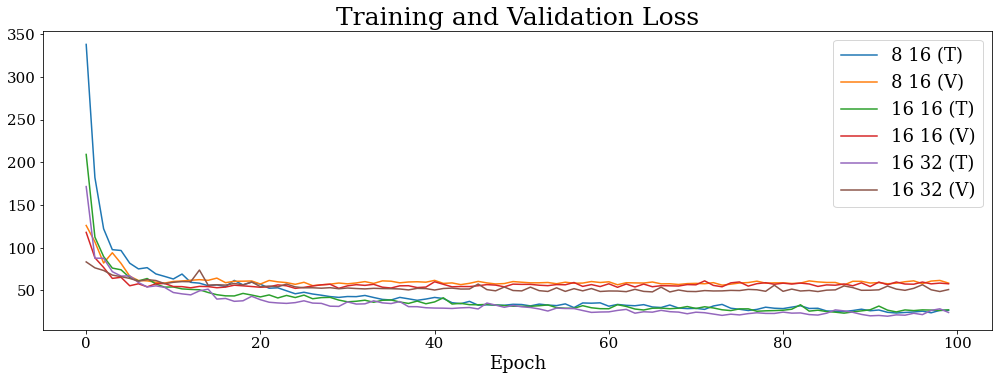

In [112]:
fig = plt.figure(figsize=(17,5.5))

plt.plot(history_filter2.history['loss'], label='8 16 (T)')
plt.plot(history_filter2.history['val_mean_absolute_percentage_error'], label='8 16 (V)')
plt.plot(history_filter3.history['loss'], label='16 16 (T)')
plt.plot(history_filter3.history['val_mean_absolute_percentage_error'], label='16 16 (V)')
plt.plot(history_filter1.history['loss'], label='16 32 (T)')
plt.plot(history_filter1.history['val_mean_absolute_percentage_error'], label='16 32 (V)')
# axes[0].set_ylabel('Mean Absolute Percentage Error')
plt.xlabel('Epoch', fontsize=18)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)

plt.title('Training and Validation Loss', fontsize=25)
plt.legend(fontsize = 18)
# fig.title('Mean Absolute Percentage Error Loss')

fig.savefig('/content/drive/MyDrive/dl-cw/regression/filter.png')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 62, 62, 16)        448       
                                                                 
 activation_6 (Activation)   (None, 62, 62, 16)        0         
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 31, 31, 16)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 29, 29, 16)        2320      
                                                                 
 activation_7 (Activation)   (None, 29, 29, 16)        0         
                                                         

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


14/14 [==============================] - 2s 47ms/step - loss: 183.7678 - mean_absolute_percentage_error: 183.7678 - val_loss: 92.2762 - val_mean_absolute_percentage_error: 92.2762
Epoch 2/100
14/14 [==============================] - 0s 21ms/step - loss: 122.7688 - mean_absolute_percentage_error: 122.7688 - val_loss: 81.4297 - val_mean_absolute_percentage_error: 81.4297
Epoch 3/100
14/14 [==============================] - 0s 21ms/step - loss: 95.2765 - mean_absolute_percentage_error: 95.2765 - val_loss: 94.9613 - val_mean_absolute_percentage_error: 94.9613
Epoch 4/100
14/14 [==============================] - 0s 13ms/step - loss: 91.4531 - mean_absolute_percentage_error: 91.4531 - val_loss: 74.7124 - val_mean_absolute_percentage_error: 74.7124
Epoch 5/100
14/14 [==============================] - 0s 17ms/step - loss: 73.4859 - mean_absolute_percentage_error: 73.4859 - val_loss: 71.1256 - val_mean_absolute_percentage_error: 71.1256
Epoch 6/100
14/14 [==============================] - 0s 17

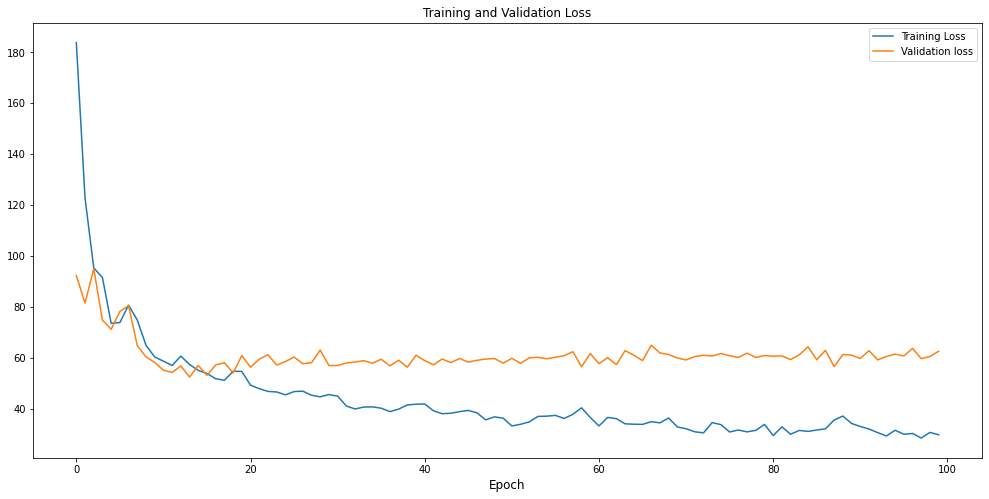

In [12]:
import tensorflow as tf
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.utils import np_utils
from keras.optimizers import Adam
from keras.layers import Conv2D, MaxPooling2D, Flatten, AveragePooling2D
tf.random.set_seed(1234)
from google.colab import drive
drive.mount('/content/drive')

chanDim = -1
model = Sequential()

# . . . 

model.add(Conv2D(16, (3,3), padding='valid', strides=1, input_shape=X_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(16, (3,3), padding='valid', strides=1, input_shape=X_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(AveragePooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(1))
# . . . 

model.summary()
opt = Adam(lr=1e-3, decay=1e-3 / 200)

model.compile(loss="mean_absolute_percentage_error", optimizer=opt, metrics=['mean_absolute_percentage_error'])

# train the model
print("[INFO] training model...")
history_no_padding = model.fit(X_train, Y_train, validation_data=(X_val, Y_val), epochs=100, batch_size=32)

prices_predicted = model.predict(X_val).flatten()
print(model.predict(X_val).shape)
print(Y_val.shape)
diff = ((prices_predicted - Y_val) / Y_val) * 100
error_mean = np.mean(np.abs(diff))

print("Estimation Error: {:.2f}%".format(error_mean))

model.save('/content/drive/MyDrive/dl-cw/regression/no_padding')

fig = plt.figure(figsize=(17,8))
plt.plot(history_no_padding.history['loss'], label='Training Loss')
# axes[0].set_ylabel('Mean Absolute Percentage Error')
plt.xlabel('Epoch', fontsize=12)
plt.yticks(fontsize=10)
plt.xticks(fontsize=10)

plt.plot(history_no_padding.history['val_mean_absolute_percentage_error'], label='Validation loss')
plt.title('Training and Validation Loss')
plt.legend()
# fig.title('Mean Absolute Percentage Error Loss')

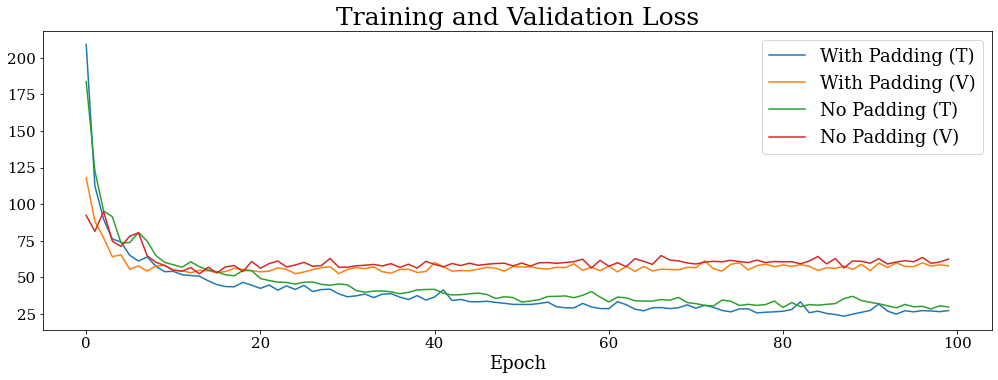

In [117]:
fig = plt.figure(figsize=(17,5.5))
plt.plot(history_filter3.history['loss'], label='With Padding (T)')
plt.plot(history_filter3.history['val_loss'], label='With Padding (V)')
plt.plot(history_no_padding.history['loss'], label='No Padding (T)')
plt.plot(history_no_padding.history['val_loss'], label='No Padding (V)')
# axes[0].set_ylabel('Mean Absolute Percentage Error')
plt.xlabel('Epoch', fontsize=18)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)


plt.title('Training and Validation Loss', fontsize=25)
plt.legend(fontsize = 18)
# fig.title('Mean Absolute Percentage Error Loss')

fig.savefig('/content/drive/MyDrive/dl-cw/regression/padding.png')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 64, 64, 16)        448       
                                                                 
 activation_8 (Activation)   (None, 64, 64, 16)        0         
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 32, 32, 16)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 32, 32, 16)        2320      
                                                                 
 activation_9 (Activation)   (None, 32, 32, 16)        0         
                                                         

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


14/14 [==============================] - 1s 17ms/step - loss: 884.8463 - mean_absolute_percentage_error: 884.8463 - val_loss: 459.6135 - val_mean_absolute_percentage_error: 459.6135
Epoch 2/100
14/14 [==============================] - 0s 7ms/step - loss: 345.2890 - mean_absolute_percentage_error: 345.2890 - val_loss: 79.2996 - val_mean_absolute_percentage_error: 79.2996
Epoch 3/100
14/14 [==============================] - 0s 8ms/step - loss: 222.2982 - mean_absolute_percentage_error: 222.2982 - val_loss: 149.7318 - val_mean_absolute_percentage_error: 149.7318
Epoch 4/100
14/14 [==============================] - 0s 7ms/step - loss: 119.0695 - mean_absolute_percentage_error: 119.0695 - val_loss: 189.2780 - val_mean_absolute_percentage_error: 189.2780
Epoch 5/100
14/14 [==============================] - 0s 7ms/step - loss: 125.7215 - mean_absolute_percentage_error: 125.7215 - val_loss: 62.5295 - val_mean_absolute_percentage_error: 62.5295
Epoch 6/100
14/14 [==============================]

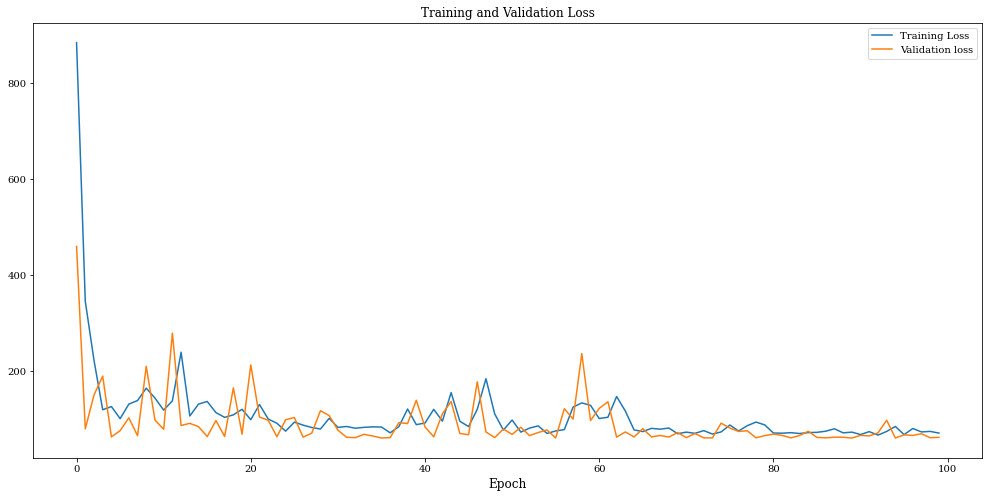

In [15]:
import tensorflow as tf
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.utils import np_utils
from keras.optimizers import Adam
from keras.layers import Conv2D, MaxPooling2D, Flatten, AveragePooling2D
tf.random.set_seed(1234)
from google.colab import drive
drive.mount('/content/drive')

chanDim = -1
model = Sequential()

# . . . 

model.add(Conv2D(16, (3,3), padding='same', strides=1, input_shape=X_train.shape[1:]))
model.add(Activation('sigmoid'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(16, (3,3), padding='same', strides=1, input_shape=X_train.shape[1:]))
model.add(Activation('sigmoid'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(AveragePooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(1))
# . . . 

model.summary()
opt = Adam(lr=1e-3, decay=1e-3 / 200)

model.compile(loss="mean_absolute_percentage_error", optimizer=opt, metrics=['mean_absolute_percentage_error'])

# train the model
print("[INFO] training model...")
history_sigmoid = model.fit(X_train, Y_train, validation_data=(X_val, Y_val), epochs=100, batch_size=32)

prices_predicted = model.predict(X_val).flatten()
print(model.predict(X_val).shape)
print(Y_val.shape)
diff = ((prices_predicted - Y_val) / Y_val) * 100
error_mean = np.mean(np.abs(diff))

print("Estimation Error: {:.2f}%".format(error_mean))

model.save('/content/drive/MyDrive/dl-cw/regression/sigmoid')

fig = plt.figure(figsize=(17,8))
plt.plot(history_sigmoid.history['loss'], label='Training Loss')
# axes[0].set_ylabel('Mean Absolute Percentage Error')
plt.xlabel('Epoch', fontsize=12)
plt.yticks(fontsize=10)
plt.xticks(fontsize=10)

plt.plot(history_sigmoid.history['val_mean_absolute_percentage_error'], label='Validation loss')
plt.title('Training and Validation Loss')
plt.legend()
# fig.title('Mean Absolute Percentage Error Loss')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 64, 64, 16)        448       
                                                                 
 activation_10 (Activation)  (None, 64, 64, 16)        0         
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 32, 32, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 32, 32, 16)        2320      
                                                                 
 activation_11 (Activation)  (None, 32, 32, 16)        0         
                                                         

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


14/14 [==============================] - 1s 22ms/step - loss: 299.9116 - mean_absolute_percentage_error: 299.9116 - val_loss: 166.9495 - val_mean_absolute_percentage_error: 166.9495
Epoch 2/100
14/14 [==============================] - 0s 10ms/step - loss: 138.9471 - mean_absolute_percentage_error: 138.9471 - val_loss: 118.4290 - val_mean_absolute_percentage_error: 118.4290
Epoch 3/100
14/14 [==============================] - 0s 8ms/step - loss: 135.6320 - mean_absolute_percentage_error: 135.6320 - val_loss: 97.2952 - val_mean_absolute_percentage_error: 97.2952
Epoch 4/100
14/14 [==============================] - 0s 9ms/step - loss: 111.9215 - mean_absolute_percentage_error: 111.9215 - val_loss: 161.7587 - val_mean_absolute_percentage_error: 161.7587
Epoch 5/100
14/14 [==============================] - 0s 11ms/step - loss: 103.6341 - mean_absolute_percentage_error: 103.6341 - val_loss: 85.1866 - val_mean_absolute_percentage_error: 85.1866
Epoch 6/100
14/14 [=============================

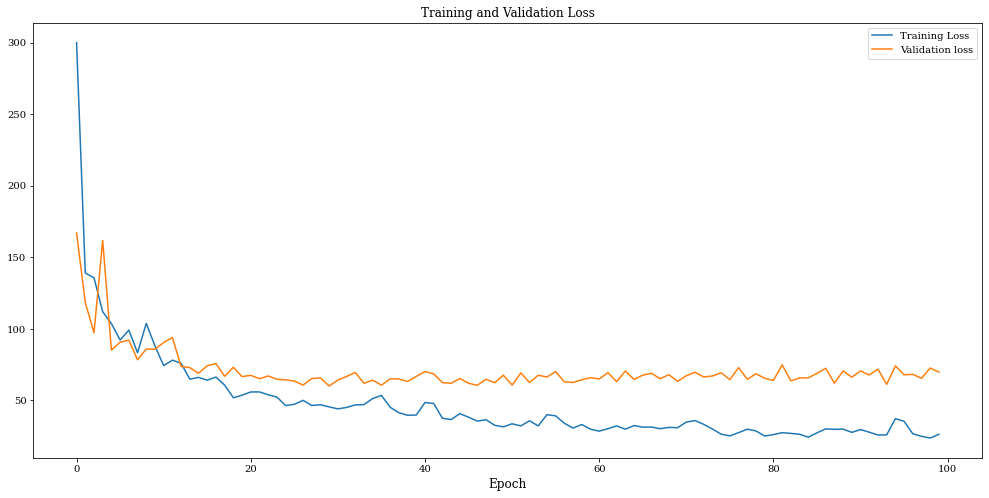

In [16]:
import tensorflow as tf
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.utils import np_utils
from keras.optimizers import Adam
from keras.layers import Conv2D, MaxPooling2D, Flatten, AveragePooling2D
tf.random.set_seed(1234)
from google.colab import drive
drive.mount('/content/drive')

chanDim = -1
model = Sequential()

# . . . 

model.add(Conv2D(16, (3,3), padding='same', strides=1, input_shape=X_train.shape[1:]))
model.add(Activation('elu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(16, (3,3), padding='same', strides=1, input_shape=X_train.shape[1:]))
model.add(Activation('elu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(AveragePooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(1))
# . . . 

model.summary()
opt = Adam(lr=1e-3, decay=1e-3 / 200)

model.compile(loss="mean_absolute_percentage_error", optimizer=opt, metrics=['mean_absolute_percentage_error'])

# train the model
print("[INFO] training model...")
history_elu = model.fit(X_train, Y_train, validation_data=(X_val, Y_val), epochs=100, batch_size=32)

prices_predicted = model.predict(X_val).flatten()
print(model.predict(X_val).shape)
print(Y_val.shape)
diff = ((prices_predicted - Y_val) / Y_val) * 100
error_mean = np.mean(np.abs(diff))

print("Estimation Error: {:.2f}%".format(error_mean))

model.save('/content/drive/MyDrive/dl-cw/regression/elu')

fig = plt.figure(figsize=(17,8))
plt.plot(history_elu.history['loss'], label='Training Loss')
# axes[0].set_ylabel('Mean Absolute Percentage Error')
plt.xlabel('Epoch', fontsize=12)
plt.yticks(fontsize=10)
plt.xticks(fontsize=10)

plt.plot(history_elu.history['val_mean_absolute_percentage_error'], label='Validation loss')
plt.title('Training and Validation Loss')
plt.legend()
# fig.title('Mean Absolute Percentage Error Loss')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 64, 64, 16)        448       
                                                                 
 activation_12 (Activation)  (None, 64, 64, 16)        0         
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 32, 32, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 32, 32, 16)        2320      
                                                                 
 activation_13 (Activation)  (None, 32, 32, 16)        0         
                                                         

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


14/14 [==============================] - 1s 37ms/step - loss: 680.5536 - mean_absolute_percentage_error: 680.5536 - val_loss: 286.3913 - val_mean_absolute_percentage_error: 286.3913
Epoch 2/100
14/14 [==============================] - 0s 10ms/step - loss: 277.9172 - mean_absolute_percentage_error: 277.9172 - val_loss: 174.8748 - val_mean_absolute_percentage_error: 174.8748
Epoch 3/100
14/14 [==============================] - 0s 10ms/step - loss: 197.4606 - mean_absolute_percentage_error: 197.4606 - val_loss: 155.1480 - val_mean_absolute_percentage_error: 155.1480
Epoch 4/100
14/14 [==============================] - 0s 10ms/step - loss: 169.3512 - mean_absolute_percentage_error: 169.3512 - val_loss: 143.1320 - val_mean_absolute_percentage_error: 143.1320
Epoch 5/100
14/14 [==============================] - 0s 10ms/step - loss: 122.4122 - mean_absolute_percentage_error: 122.4122 - val_loss: 142.6486 - val_mean_absolute_percentage_error: 142.6486
Epoch 6/100
14/14 [=======================

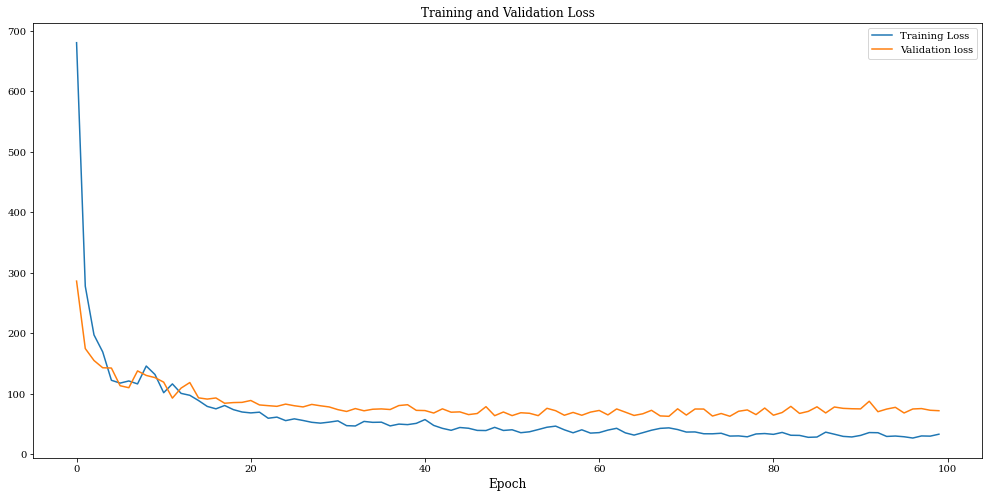

In [17]:
import tensorflow as tf
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.utils import np_utils
from keras.optimizers import Adam
from keras.layers import Conv2D, MaxPooling2D, Flatten, AveragePooling2D
tf.random.set_seed(1234)
from google.colab import drive
drive.mount('/content/drive')

chanDim = -1
model = Sequential()

# . . . 

model.add(Conv2D(16, (3,3), padding='same', strides=1, input_shape=X_train.shape[1:]))
model.add(Activation('selu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(16, (3,3), padding='same', strides=1, input_shape=X_train.shape[1:]))
model.add(Activation('selu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(AveragePooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(1))
# . . . 

model.summary()
opt = Adam(lr=1e-3, decay=1e-3 / 200)

model.compile(loss="mean_absolute_percentage_error", optimizer=opt, metrics=['mean_absolute_percentage_error'])

# train the model
print("[INFO] training model...")
history_selu = model.fit(X_train, Y_train, validation_data=(X_val, Y_val), epochs=100, batch_size=32)

prices_predicted = model.predict(X_val).flatten()
print(model.predict(X_val).shape)
print(Y_val.shape)
diff = ((prices_predicted - Y_val) / Y_val) * 100
error_mean = np.mean(np.abs(diff))

print("Estimation Error: {:.2f}%".format(error_mean))

model.save('/content/drive/MyDrive/dl-cw/regression/selu')

fig = plt.figure(figsize=(17,8))
plt.plot(history_selu.history['loss'], label='Training Loss')
# axes[0].set_ylabel('Mean Absolute Percentage Error')
plt.xlabel('Epoch', fontsize=12)
plt.yticks(fontsize=10)
plt.xticks(fontsize=10)

plt.plot(history_selu.history['val_mean_absolute_percentage_error'], label='Validation loss')
plt.title('Training and Validation Loss')
plt.legend()
# fig.title('Mean Absolute Percentage Error Loss')

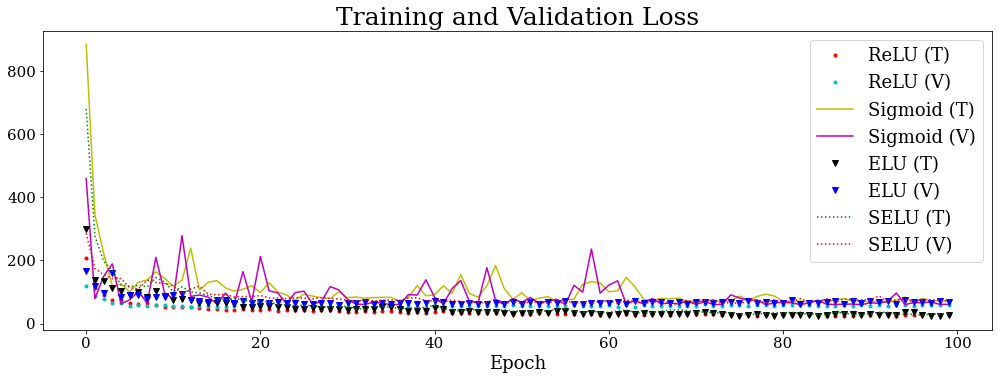

In [109]:
fig = plt.figure(figsize=(17,5.5))
plt.plot(history_filter3.history['loss'], 'r.', label='ReLU (T)')
plt.plot(history_filter3.history['val_loss'], 'c.', label='ReLU (V)')
plt.plot(history_sigmoid.history['loss'], 'y-', label='Sigmoid (T)')
plt.plot(history_sigmoid.history['val_loss'], 'm-',label='Sigmoid (V)')
plt.plot(history_elu.history['loss'],'kv', label='ELU (T)')
plt.plot(history_elu.history['val_loss'], 'bv', label='ELU (V)')
plt.plot(history_selu.history['loss'],'g:', label='SELU (T)')
plt.plot(history_selu.history['val_loss'], 'r:', label='SELU (V)')


# axes[0].set_ylabel('Mean Absolute Percentage Error')
plt.xlabel('Epoch', fontsize=18)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)

plt.title('Training and Validation Loss', fontsize=25)
plt.legend(fontsize = 18)
# fig.title('Mean Absolute Percentage Error Loss')

fig.savefig('/content/drive/MyDrive/dl-cw/regression/act.png')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 32, 32, 16)        448       
                                                                 
 activation_14 (Activation)  (None, 32, 32, 16)        0         
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 16, 16, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_15 (Conv2D)          (None, 8, 8, 16)          2320      
                                                                 
 activation_15 (Activation)  (None, 8, 8, 16)          0         
                                                         

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


14/14 [==============================] - 1s 28ms/step - loss: 162.3347 - mean_absolute_percentage_error: 162.3347 - val_loss: 117.1515 - val_mean_absolute_percentage_error: 117.1515
Epoch 2/100
14/14 [==============================] - 0s 9ms/step - loss: 111.1176 - mean_absolute_percentage_error: 111.1176 - val_loss: 85.1174 - val_mean_absolute_percentage_error: 85.1174
Epoch 3/100
14/14 [==============================] - 0s 8ms/step - loss: 94.4900 - mean_absolute_percentage_error: 94.4900 - val_loss: 75.2177 - val_mean_absolute_percentage_error: 75.2177
Epoch 4/100
14/14 [==============================] - 0s 9ms/step - loss: 76.9132 - mean_absolute_percentage_error: 76.9132 - val_loss: 70.1009 - val_mean_absolute_percentage_error: 70.1009
Epoch 5/100
14/14 [==============================] - 0s 7ms/step - loss: 70.6716 - mean_absolute_percentage_error: 70.6716 - val_loss: 66.5311 - val_mean_absolute_percentage_error: 66.5311
Epoch 6/100
14/14 [==============================] - 0s 8ms/

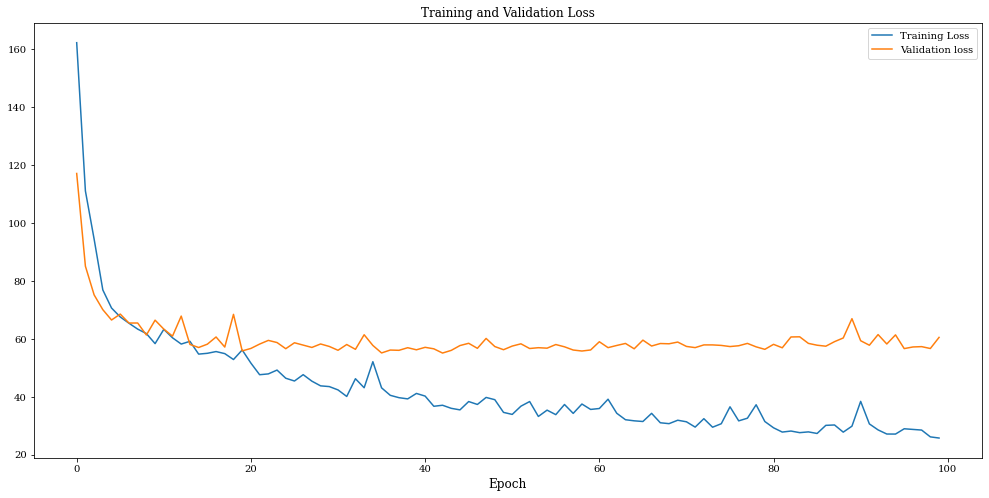

In [36]:
import tensorflow as tf
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.utils import np_utils
from keras.optimizers import Adam
from keras.layers import Conv2D, MaxPooling2D, Flatten, AveragePooling2D
tf.random.set_seed(1234)
from google.colab import drive
drive.mount('/content/drive')

chanDim = -1
model = Sequential()

# . . . 

model.add(Conv2D(16, (3,3), padding='same', strides=2, input_shape=X_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(16, (3,3), padding='same', strides=2, input_shape=X_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(AveragePooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(1))
# . . . 

model.summary()
opt = Adam(lr=1e-3, decay=1e-3 / 200)

model.compile(loss="mean_absolute_percentage_error", optimizer=opt, metrics=['mean_absolute_percentage_error'])

# train the model
print("[INFO] training model...")
history_strides2 = model.fit(X_train, Y_train, validation_data=(X_val, Y_val), epochs=100, batch_size=32)

prices_predicted = model.predict(X_val).flatten()
print(model.predict(X_val).shape)
print(Y_val.shape)
diff = ((prices_predicted - Y_val) / Y_val) * 100
error_mean = np.mean(np.abs(diff))

print("Estimation Error: {:.2f}%".format(error_mean))

model.save('/content/drive/MyDrive/dl-cw/regression/strides2')

fig = plt.figure(figsize=(17,8))
plt.plot(history_strides2.history['loss'], label='Training Loss')
# axes[0].set_ylabel('Mean Absolute Percentage Error')
plt.xlabel('Epoch', fontsize=12)
plt.yticks(fontsize=10)
plt.xticks(fontsize=10)

plt.plot(history_strides2.history['val_mean_absolute_percentage_error'], label='Validation loss')
plt.title('Training and Validation Loss')
plt.legend()
# fig.title('Mean Absolute Percentage Error Loss')

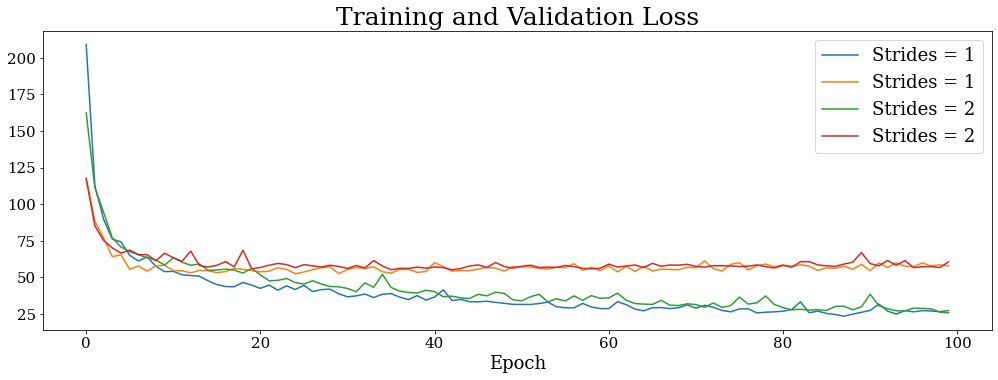

In [110]:
fig = plt.figure(figsize=(17,5.5))
plt.plot(history_filter3.history['loss'], label='Strides = 1')
plt.plot(history_filter3.history['val_mean_absolute_percentage_error'], label='Strides = 1')
plt.plot(history_strides2.history['loss'], label='Strides = 2')
plt.plot(history_strides2.history['val_mean_absolute_percentage_error'], label='Strides = 2')
# axes[0].set_ylabel('Mean Absolute Percentage Error')
plt.xlabel('Epoch', fontsize=18)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)



plt.title('Training and Validation Loss', fontsize=25)
plt.legend(fontsize = 18)
# fig.title('Mean Absolute Percentage Error Loss')

fig.savefig('/content/drive/MyDrive/dl-cw/regression/strides.png')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_34 (Conv2D)          (None, 32, 32, 16)        448       
                                                                 
 activation_34 (Activation)  (None, 32, 32, 16)        0         
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 16, 16, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_35 (Conv2D)          (None, 8, 8, 16)          2320      
                                                                 
 activation_35 (Activation)  (None, 8, 8, 16)          0         
                                                        

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


14/14 [==============================] - 1s 15ms/step - loss: 247.0733 - mean_absolute_percentage_error: 247.0733 - val_loss: 167.9006 - val_mean_absolute_percentage_error: 167.9006
Epoch 2/100
14/14 [==============================] - 0s 6ms/step - loss: 154.3688 - mean_absolute_percentage_error: 154.3688 - val_loss: 121.2834 - val_mean_absolute_percentage_error: 121.2834
Epoch 3/100
14/14 [==============================] - 0s 6ms/step - loss: 121.7769 - mean_absolute_percentage_error: 121.7769 - val_loss: 100.1149 - val_mean_absolute_percentage_error: 100.1149
Epoch 4/100
14/14 [==============================] - 0s 6ms/step - loss: 101.1884 - mean_absolute_percentage_error: 101.1884 - val_loss: 88.3652 - val_mean_absolute_percentage_error: 88.3652
Epoch 5/100
14/14 [==============================] - 0s 5ms/step - loss: 89.8096 - mean_absolute_percentage_error: 89.8096 - val_loss: 86.3497 - val_mean_absolute_percentage_error: 86.3497
Epoch 6/100
14/14 [==============================] -

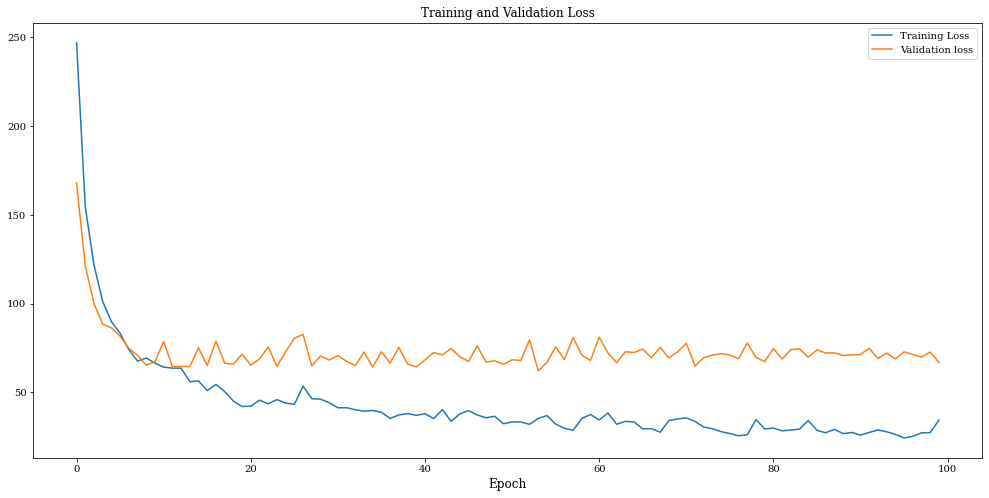

In [51]:
import tensorflow as tf
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.utils import np_utils
from keras.optimizers import Adam
from keras.layers import Conv2D, MaxPooling2D, Flatten, AveragePooling2D
tf.random.set_seed(1234)
from google.colab import drive
drive.mount('/content/drive')

chanDim = -1
model = Sequential()

# . . . 

model.add(Conv2D(16, (3,3), padding='same', strides=2, input_shape=X_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(16, (3,3), padding='same', strides=2, input_shape=X_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(1))
# . . . 

model.summary()
opt = Adam(lr=1e-3, decay=1e-3 / 200)

model.compile(loss="mean_absolute_percentage_error", optimizer=opt, metrics=['mean_absolute_percentage_error'])

# train the model
print("[INFO] training model...")
history_maxpool = model.fit(X_train, Y_train, validation_data=(X_val, Y_val), epochs=100, batch_size=32)

prices_predicted = model.predict(X_val).flatten()
print(model.predict(X_val).shape)
print(Y_val.shape)
diff = ((prices_predicted - Y_val) / Y_val) * 100
error_mean = np.mean(np.abs(diff))

print("Estimation Error: {:.2f}%".format(error_mean))

model.save('/content/drive/MyDrive/dl-cw/regression/maxpool')

fig = plt.figure(figsize=(17,8))
plt.plot(history_maxpool.history['loss'], label='Training Loss')
# axes[0].set_ylabel('Mean Absolute Percentage Error')
plt.xlabel('Epoch', fontsize=12)
plt.yticks(fontsize=10)
plt.xticks(fontsize=10)

plt.plot(history_maxpool.history['val_mean_absolute_percentage_error'], label='Validation loss')
plt.title('Training and Validation Loss')
plt.legend()
# fig.title('Mean Absolute Percentage Error Loss')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_32 (Conv2D)          (None, 32, 32, 16)        448       
                                                                 
 activation_32 (Activation)  (None, 32, 32, 16)        0         
                                                                 
 average_pooling2d_15 (Avera  (None, 16, 16, 16)       0         
 gePooling2D)                                                    
                                                                 
 conv2d_33 (Conv2D)          (None, 8, 8, 16)          2320      
                                                                 
 activation_33 (Activation)  (None, 8, 8, 16)          0         
                                                        

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


14/14 [==============================] - 2s 35ms/step - loss: 114.3306 - mean_absolute_percentage_error: 114.3306 - val_loss: 89.7774 - val_mean_absolute_percentage_error: 89.7774
Epoch 2/100
14/14 [==============================] - 0s 10ms/step - loss: 81.9651 - mean_absolute_percentage_error: 81.9651 - val_loss: 81.4559 - val_mean_absolute_percentage_error: 81.4559
Epoch 3/100
14/14 [==============================] - 0s 12ms/step - loss: 75.3543 - mean_absolute_percentage_error: 75.3543 - val_loss: 69.7523 - val_mean_absolute_percentage_error: 69.7523
Epoch 4/100
14/14 [==============================] - 0s 11ms/step - loss: 73.5323 - mean_absolute_percentage_error: 73.5323 - val_loss: 64.5749 - val_mean_absolute_percentage_error: 64.5749
Epoch 5/100
14/14 [==============================] - 0s 11ms/step - loss: 66.4464 - mean_absolute_percentage_error: 66.4464 - val_loss: 61.4011 - val_mean_absolute_percentage_error: 61.4011
Epoch 6/100
14/14 [==============================] - 0s 16ms

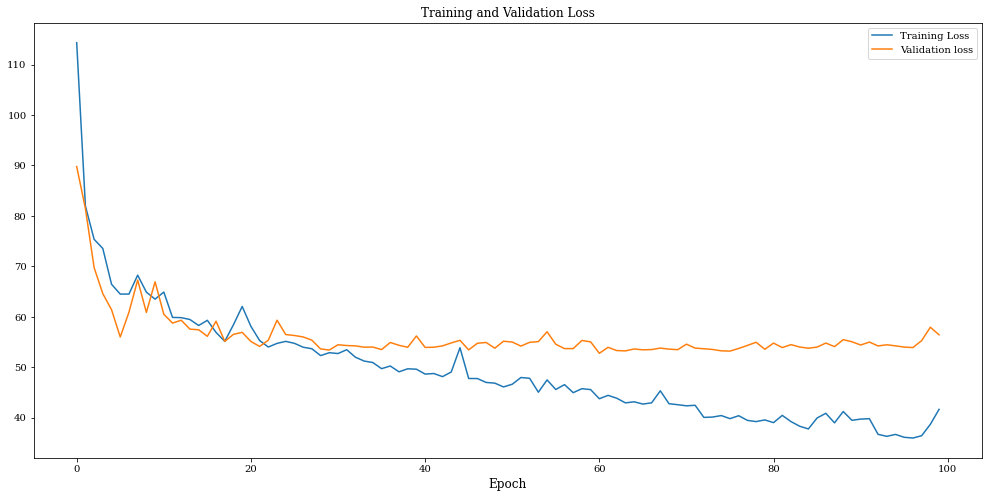

In [50]:
import tensorflow as tf
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.utils import np_utils
from keras.optimizers import Adam
from keras.layers import Conv2D, MaxPooling2D, Flatten, AveragePooling2D
tf.random.set_seed(1234)
from google.colab import drive
drive.mount('/content/drive')

chanDim = -1
model = Sequential()

# . . . 

model.add(Conv2D(16, (3,3), padding='same', strides=2, input_shape=X_train.shape[1:]))
model.add(Activation('relu'))
model.add(AveragePooling2D(pool_size=(2,2)))
model.add(Conv2D(16, (3,3), padding='same', strides=2, input_shape=X_train.shape[1:]))
model.add(Activation('relu'))
model.add(AveragePooling2D(pool_size=(2,2)))
model.add(AveragePooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(1))
# . . . 

model.summary()
opt = Adam(lr=1e-3, decay=1e-3 / 200)

model.compile(loss="mean_absolute_percentage_error", optimizer=opt, metrics=['mean_absolute_percentage_error'])

# train the model
print("[INFO] training model...")
history_avgpool = model.fit(X_train, Y_train, validation_data=(X_val, Y_val), epochs=100, batch_size=32)

prices_predicted = model.predict(X_val).flatten()
print(model.predict(X_val).shape)
print(Y_val.shape)
diff = ((prices_predicted - Y_val) / Y_val) * 100
error_mean = np.mean(np.abs(diff))

print("Estimation Error: {:.2f}%".format(error_mean))

model.save('/content/drive/MyDrive/dl-cw/regression/avgpool')

fig = plt.figure(figsize=(17,8))
plt.plot(history_avgpool.history['loss'], label='Training Loss')
# axes[0].set_ylabel('Mean Absolute Percentage Error')
plt.xlabel('Epoch', fontsize=12)
plt.yticks(fontsize=10)
plt.xticks(fontsize=10)

plt.plot(history_avgpool.history['val_mean_absolute_percentage_error'], label='Validation loss')
plt.title('Training and Validation Loss')
plt.legend()
# fig.title('Mean Absolute Percentage Error Loss')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_30 (Conv2D)          (None, 31, 31, 16)        448       
                                                                 
 activation_30 (Activation)  (None, 31, 31, 16)        0         
                                                                 
 conv2d_31 (Conv2D)          (None, 15, 15, 16)        2320      
                                                                 
 activation_31 (Activation)  (None, 15, 15, 16)        0         
                                                                 
 flatten_15 (Flatten)        (None, 3600)              0         
                                                                 
 dense_15 (Dense)            (None, 1)                 3

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


14/14 [==============================] - 1s 16ms/step - loss: 263.6842 - mean_absolute_percentage_error: 263.6842 - val_loss: 177.4196 - val_mean_absolute_percentage_error: 177.4196
Epoch 2/100
14/14 [==============================] - 0s 7ms/step - loss: 112.2314 - mean_absolute_percentage_error: 112.2314 - val_loss: 71.3187 - val_mean_absolute_percentage_error: 71.3187
Epoch 3/100
14/14 [==============================] - 0s 6ms/step - loss: 72.2009 - mean_absolute_percentage_error: 72.2009 - val_loss: 60.0199 - val_mean_absolute_percentage_error: 60.0199
Epoch 4/100
14/14 [==============================] - 0s 6ms/step - loss: 63.8825 - mean_absolute_percentage_error: 63.8825 - val_loss: 59.6780 - val_mean_absolute_percentage_error: 59.6780
Epoch 5/100
14/14 [==============================] - 0s 6ms/step - loss: 57.9745 - mean_absolute_percentage_error: 57.9745 - val_loss: 59.9406 - val_mean_absolute_percentage_error: 59.9406
Epoch 6/100
14/14 [==============================] - 0s 5ms/

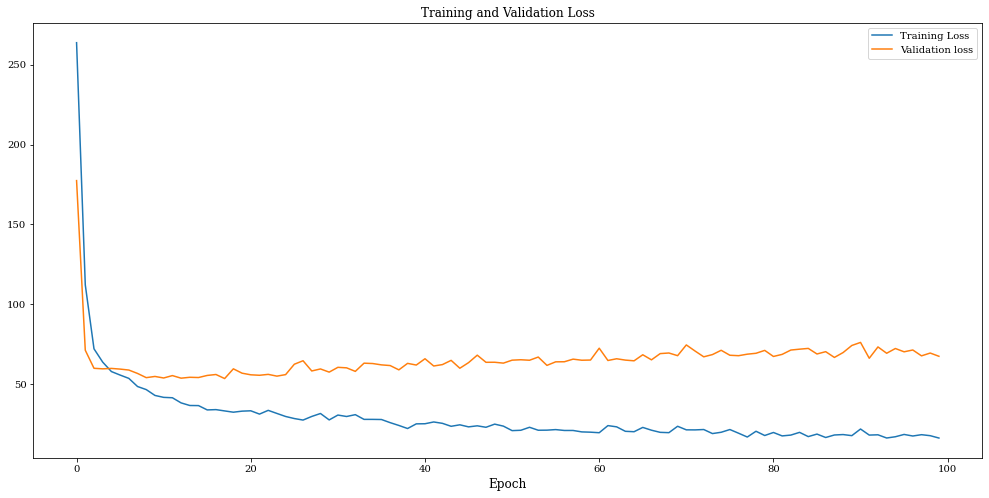

In [49]:
import tensorflow as tf
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.utils import np_utils
from keras.optimizers import Adam
from keras.layers import Conv2D, MaxPooling2D, Flatten, AveragePooling2D
tf.random.set_seed(1234)
from google.colab import drive
drive.mount('/content/drive')

chanDim = -1
model = Sequential()

# . . . 

model.add(Conv2D(16, (3,3), padding='valid', strides=2, input_shape=X_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(16, (3,3), padding='valid', strides=2, input_shape=X_train.shape[1:]))
model.add(Activation('relu'))
model.add(Flatten())
model.add(Dense(1))
# . . . 

model.summary()
opt = Adam(lr=1e-3, decay=1e-3 / 200)

model.compile(loss="mean_absolute_percentage_error", optimizer=opt, metrics=['mean_absolute_percentage_error'])

# train the model
print("[INFO] training model...")
history_noppool = model.fit(X_train, Y_train, validation_data=(X_val, Y_val), epochs=100, batch_size=32)

prices_predicted = model.predict(X_val).flatten()
print(model.predict(X_val).shape)
print(Y_val.shape)
diff = ((prices_predicted - Y_val) / Y_val) * 100
error_mean = np.mean(np.abs(diff))

print("Estimation Error: {:.2f}%".format(error_mean))

model.save('/content/drive/MyDrive/dl-cw/regression/noppool')

fig = plt.figure(figsize=(17,8))
plt.plot(history_noppool.history['loss'], label='Training Loss')
# axes[0].set_ylabel('Mean Absolute Percentage Error')
plt.xlabel('Epoch', fontsize=12)
plt.yticks(fontsize=10)
plt.xticks(fontsize=10)

plt.plot(history_noppool.history['val_mean_absolute_percentage_error'], label='Validation loss')
plt.title('Training and Validation Loss')
plt.legend()
# fig.title('Mean Absolute Percentage Error Loss')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_28 (Conv2D)          (None, 64, 64, 16)        448       
                                                                 
 activation_28 (Activation)  (None, 64, 64, 16)        0         
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 32, 32, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_29 (Conv2D)          (None, 32, 32, 16)        2320      
                                                                 
 activation_29 (Activation)  (None, 32, 32, 16)        0         
                                                        

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


14/14 [==============================] - 1s 37ms/step - loss: 884.8464 - mean_absolute_percentage_error: 884.8464 - val_loss: 459.6135 - val_mean_absolute_percentage_error: 459.6135
Epoch 2/100
14/14 [==============================] - 0s 12ms/step - loss: 345.2891 - mean_absolute_percentage_error: 345.2891 - val_loss: 79.2996 - val_mean_absolute_percentage_error: 79.2996
Epoch 3/100
14/14 [==============================] - 0s 13ms/step - loss: 222.2982 - mean_absolute_percentage_error: 222.2982 - val_loss: 149.7314 - val_mean_absolute_percentage_error: 149.7314
Epoch 4/100
14/14 [==============================] - 0s 16ms/step - loss: 119.0697 - mean_absolute_percentage_error: 119.0697 - val_loss: 189.2771 - val_mean_absolute_percentage_error: 189.2771
Epoch 5/100
14/14 [==============================] - 0s 16ms/step - loss: 125.7215 - mean_absolute_percentage_error: 125.7215 - val_loss: 62.5299 - val_mean_absolute_percentage_error: 62.5299
Epoch 6/100
14/14 [===========================

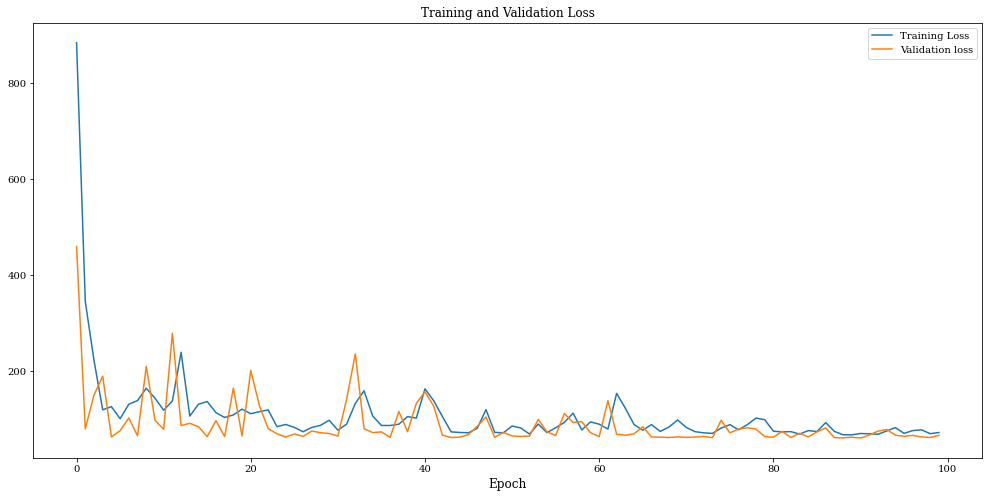

In [45]:
import tensorflow as tf
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.utils import np_utils
from keras.optimizers import Adam
from keras.layers import Conv2D, MaxPooling2D, Flatten, AveragePooling2D
tf.random.set_seed(1234)
from google.colab import drive
drive.mount('/content/drive')

chanDim = -1
model = Sequential()

# . . . 

model.add(Conv2D(16, (3,3), padding='same', strides=1, input_shape=X_train.shape[1:]))
model.add(Activation('sigmoid'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(16, (3,3), padding='same', strides=1, input_shape=X_train.shape[1:]))
model.add(Activation('sigmoid'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(AveragePooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(1))
# . . . 

model.summary()
opt = Adam(lr=1e-3, decay=1e-3 / 200)

model.compile(loss="mean_absolute_percentage_error", optimizer=opt, metrics=['mean_absolute_percentage_error'])

# train the model
print("[INFO] training model...")
history_filter3s = model.fit(X_train, Y_train, validation_data=(X_val, Y_val), epochs=100, batch_size=32)

prices_predicted = model.predict(X_val).flatten()
print(model.predict(X_val).shape)
print(Y_val.shape)
diff = ((prices_predicted - Y_val) / Y_val) * 100
error_mean = np.mean(np.abs(diff))

print("Estimation Error: {:.2f}%".format(error_mean))

model.save('/content/drive/MyDrive/dl-cw/regression/filter_3s')

fig = plt.figure(figsize=(17,8))
plt.plot(history_filter3s.history['loss'], label='Training Loss')
# axes[0].set_ylabel('Mean Absolute Percentage Error')
plt.xlabel('Epoch', fontsize=12)
plt.yticks(fontsize=10)
plt.xticks(fontsize=10)

plt.plot(history_filter3s.history['val_mean_absolute_percentage_error'], label='Validation loss')
plt.title('Training and Validation Loss')
plt.legend()
# fig.title('Mean Absolute Percentage Error Loss')

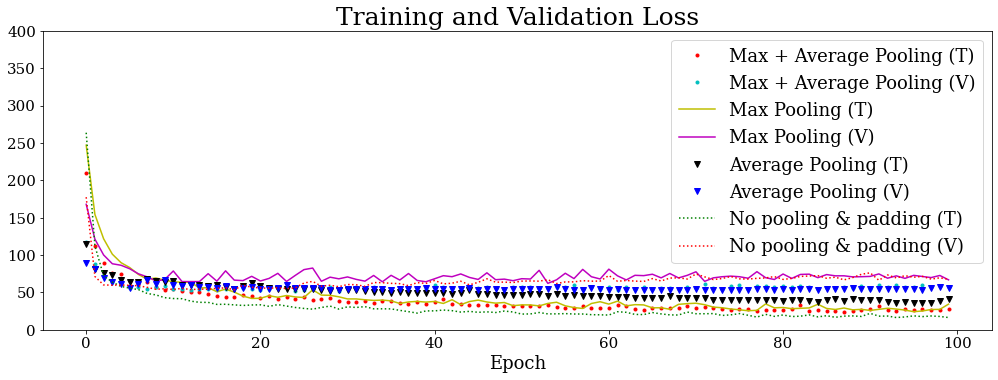

In [99]:
fig = plt.figure(figsize=(17,5.5))
plt.plot(history_filter3.history['loss'], 'r.', label='Max + Average Pooling (T)')
plt.plot(history_filter3.history['val_mean_absolute_percentage_error'], 'c.', label='Max + Average Pooling (V)')
plt.plot(history_maxpool.history['loss'], 'y-', label='Max Pooling (T)')
plt.plot(history_maxpool.history['val_mean_absolute_percentage_error'], 'm-',label='Max Pooling (V)')
plt.plot(history_avgpool.history['loss'],'kv', label='Average Pooling (T)')
plt.plot(history_avgpool.history['val_mean_absolute_percentage_error'], 'bv', label='Average Pooling (V)')
plt.plot(history_noppool.history['loss'],'g:', label='No pooling & padding (T)')
plt.plot(history_noppool.history['val_mean_absolute_percentage_error'], 'r:', label='No pooling & padding (V)')
# axes[0].set_ylabel('Mean Absolute Percentage Error')
plt.xlabel('Epoch', fontsize=18)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)


plt.title('Training and Validation Loss', fontsize=25)
plt.ylim([0, 400])
plt.legend(fontsize = 18)
# fig.title('Mean Absolute Percentage Error Loss')

fig.savefig('/content/drive/MyDrive/dl-cw/regression/pooling.png')

Fine tuning


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
We have selected frontal images. You can switch to the kitchen, frontal, bedroom or bathroom images by changing house_section variable.
Model: "sequential_41"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_81 (Conv2D)          (None, 22, 22, 2)         56        
                                                                 
 activation_81 (Activation)  (None, 22, 22, 2)         0         
                                                                 
 average_pooling2d_66 (Avera  (None, 11, 11, 2)        0         
 gePooling2D)                                                    
                                                                 
 conv2d_82 (Conv2D)          (None, 4, 4, 4)           76        
                                                    

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


14/14 [==============================] - 1s 16ms/step - loss: 693.6195 - mean_absolute_percentage_error: 693.6195 - val_loss: 385.1339 - val_mean_absolute_percentage_error: 385.1339
Epoch 2/100
14/14 [==============================] - 0s 6ms/step - loss: 276.0245 - mean_absolute_percentage_error: 276.0245 - val_loss: 98.1059 - val_mean_absolute_percentage_error: 98.1059
Epoch 3/100
14/14 [==============================] - 0s 5ms/step - loss: 87.7750 - mean_absolute_percentage_error: 87.7750 - val_loss: 80.3658 - val_mean_absolute_percentage_error: 80.3658
Epoch 4/100
14/14 [==============================] - 0s 7ms/step - loss: 79.8175 - mean_absolute_percentage_error: 79.8175 - val_loss: 61.9170 - val_mean_absolute_percentage_error: 61.9170
Epoch 5/100
14/14 [==============================] - 0s 5ms/step - loss: 71.3036 - mean_absolute_percentage_error: 71.3036 - val_loss: 61.4818 - val_mean_absolute_percentage_error: 61.4818
Epoch 6/100
14/14 [==============================] - 0s 6ms/

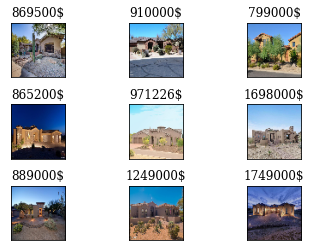

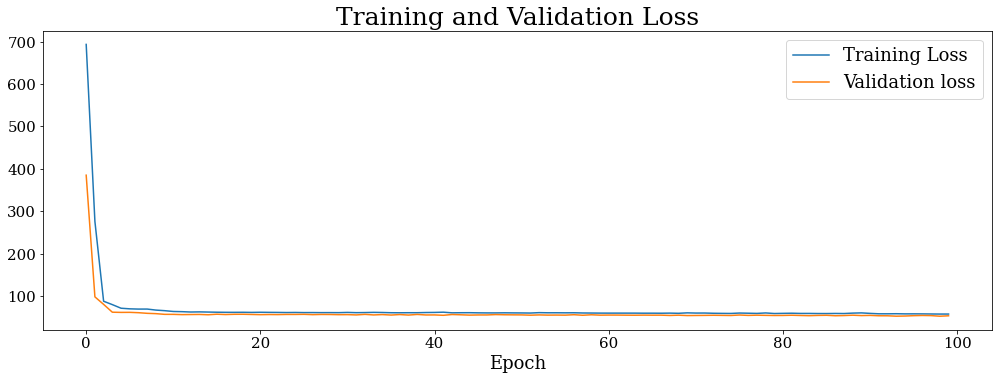

In [100]:
import tensorflow as tf
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.utils import np_utils
from keras.optimizers import Adam
from keras.layers import Conv2D, MaxPooling2D, Flatten, AveragePooling2D
tf.random.set_seed(1234)
from google.colab import drive
drive.mount('/content/drive')

house_section = 'frontal' # select between: kitchen, frontal, bedroom or bathroom
print('We have selected {} images. You can switch to the kitchen, frontal, bedroom or bathroom images by changing house_section variable.'.format(house_section))
images = []
for i_im in range(1, 536):
  image = cv2.imread(str(i_im)+'_'+house_section+'.jpg')
  image = cv2.resize(image, (64, 64))
  images.append(image)

labels = []
f = open('HousesInfo.txt', "r")
for x in f:
  label = (x).split(' ')[-1].split('\n')[0]
  labels.append(label)

# Let's visualize some examples
N=3
start_val = 0 # pick an element for the code to plot the following N**2 values
fig, axes = plt.subplots(N,N)
for row in range(N):
  for col in range(N):
    idx = start_val+row+N*col    
    tmp = cv2.cvtColor(images[idx],cv2.COLOR_BGR2RGB)
    axes[row,col].imshow(tmp, cmap='gray')
    fig.subplots_adjust(hspace=0.5)
    target = int(labels[idx])
    axes[row,col].set_title(str(target) + '$')
    axes[row,col].set_xticks([])
    axes[row,col].set_yticks([])

chanDim = -1
model = Sequential()

# . . . 

model.add(Conv2D(2, (3,3), padding='same', strides=3, input_shape=X_train.shape[1:]))
model.add(Activation('relu'))
model.add(AveragePooling2D(pool_size=(2,2)))
model.add(Conv2D(4, (3,3), padding='same', strides=3, input_shape=X_train.shape[1:]))
model.add(Activation('relu'))
model.add(AveragePooling2D(pool_size=(2,2)))
model.add(AveragePooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(1))
# . . . 

model.summary()
opt = Adam(lr=1e-3, decay=1e-3 / 200)

model.compile(loss="mean_absolute_percentage_error", optimizer=opt, metrics=['mean_absolute_percentage_error'])

# train the model
print("[INFO] training model...")
history_finetune = model.fit(X_train, Y_train, validation_data=(X_val, Y_val), epochs=100, batch_size=32)

prices_predicted = model.predict(X_val).flatten()
print(model.predict(X_val).shape)
print(Y_val.shape)
diff = ((prices_predicted - Y_val) / Y_val) * 100
error_mean = np.mean(np.abs(diff))

print("Estimation Error: {:.2f}%".format(error_mean))

model.save('/content/drive/MyDrive/dl-cw/regression/fine_tune')

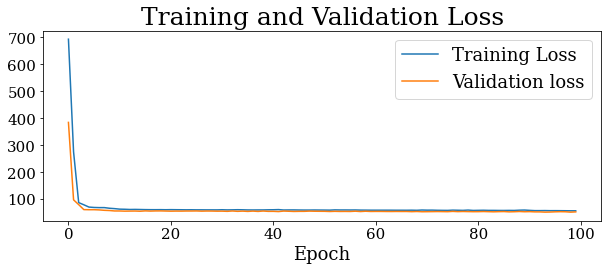

In [113]:
fig = plt.figure(figsize=(10,3.5))
plt.plot(history_finetune.history['loss'], label='Training Loss')
# axes[0].set_ylabel('Mean Absolute Percentage Error')
plt.xlabel('Epoch', fontsize=18)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)

plt.plot(history_finetune.history['val_mean_absolute_percentage_error'], label='Validation loss')
plt.title('Training and Validation Loss', fontsize=25)
plt.legend(fontsize=18)
# fig.title('Mean Absolute Percentage Error Loss')
fig.savefig('/content/drive/MyDrive/dl-cw/regression/result.png')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_48 (Conv2D)          (None, 32, 32, 16)        448       
                                                                 
 activation_48 (Activation)  (None, 32, 32, 16)        0         
                                                                 
 max_pooling2d_37 (MaxPoolin  (None, 16, 16, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_49 (Conv2D)          (None, 8, 8, 16)          2320      
                                                                 
 activation_49 (Activation)  (None, 8, 8, 16)          0         
                                                        

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


14/14 [==============================] - 1s 22ms/step - loss: 162.3347 - mean_absolute_percentage_error: 162.3347 - val_loss: 117.1515 - val_mean_absolute_percentage_error: 117.1515
Epoch 2/100
14/14 [==============================] - 0s 7ms/step - loss: 111.1176 - mean_absolute_percentage_error: 111.1176 - val_loss: 85.1174 - val_mean_absolute_percentage_error: 85.1174
Epoch 3/100
14/14 [==============================] - 0s 8ms/step - loss: 94.4900 - mean_absolute_percentage_error: 94.4900 - val_loss: 75.2177 - val_mean_absolute_percentage_error: 75.2177
Epoch 4/100
14/14 [==============================] - 0s 8ms/step - loss: 76.9132 - mean_absolute_percentage_error: 76.9132 - val_loss: 70.1009 - val_mean_absolute_percentage_error: 70.1009
Epoch 5/100
14/14 [==============================] - 0s 8ms/step - loss: 70.6716 - mean_absolute_percentage_error: 70.6716 - val_loss: 66.5311 - val_mean_absolute_percentage_error: 66.5311
Epoch 6/100
14/14 [==============================] - 0s 8ms/

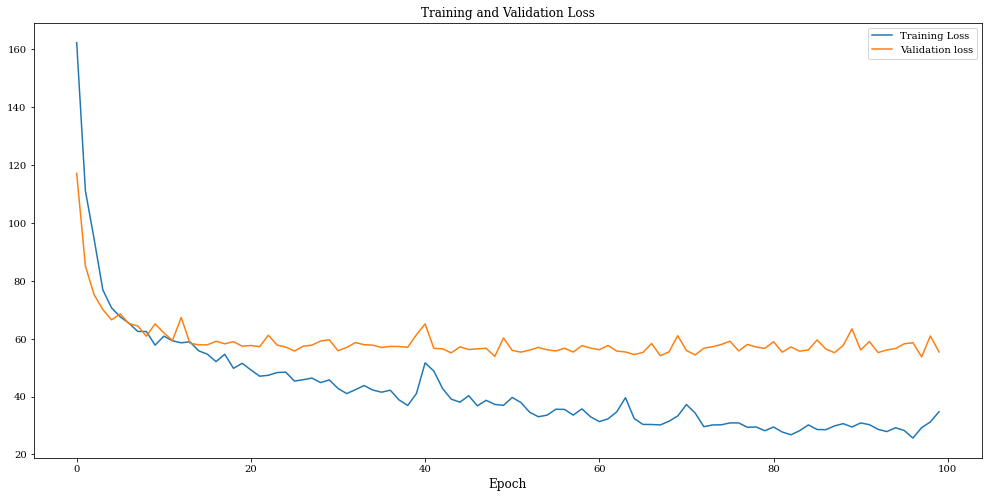

In [66]:
import tensorflow as tf
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.utils import np_utils
from keras.optimizers import Adam
from keras.layers import Conv2D, MaxPooling2D, Flatten, AveragePooling2D
tf.random.set_seed(1234)
from google.colab import drive
drive.mount('/content/drive')

chanDim = -1
model = Sequential()

# . . . 

model.add(Conv2D(16, (3,3), padding='same', strides=2, input_shape=X_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(16, (3,3), padding='same', strides=2, input_shape=X_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(AveragePooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(1))
# . . . 

model.summary()
opt = Adam(lr=1e-3, decay=1e-3 / 200)

model.compile(loss="mean_absolute_percentage_error", optimizer=opt, metrics=['mean_absolute_percentage_error'])

# train the model
print("[INFO] training model...")
history_finetune1 = model.fit(X_train, Y_train, validation_data=(X_val, Y_val), epochs=100, batch_size=32)

prices_predicted = model.predict(X_val).flatten()
print(model.predict(X_val).shape)
print(Y_val.shape)
diff = ((prices_predicted - Y_val) / Y_val) * 100
error_mean = np.mean(np.abs(diff))

print("Estimation Error: {:.2f}%".format(error_mean))

model.save('/content/drive/MyDrive/dl-cw/regression/fine_tune1')

fig = plt.figure(figsize=(17,8))
plt.plot(history_finetune1.history['loss'], label='Training Loss')
# axes[0].set_ylabel('Mean Absolute Percentage Error')
plt.xlabel('Epoch', fontsize=12)
plt.yticks(fontsize=10)
plt.xticks(fontsize=10)

plt.plot(history_finetune1.history['val_mean_absolute_percentage_error'], label='Validation loss')
plt.title('Training and Validation Loss')
plt.legend()
# fig.title('Mean Absolute Percentage Error Loss')

In [13]:
import matplotlib as mpl
import matplotlib.font_manager as fm
from matplotlib import font_manager as fm, pyplot as plt

!wget https://github.com/trishume/OpenTuringCompiler/blob/master/stdlib-sfml/fonts/Times%20New%20Roman.ttf
!wget https://github.com/matomo-org/travis-scripts/blob/master/fonts/Arial.ttf 

font_files = fm.findSystemFonts()

# Go through and add each to Matplotlib's font cache.
for font_file in font_files:
    fm.fontManager.addfont(font_file)

fm.fontManager.ttflist += fm.createFontList(['Times New Roman.ttf'])

# Use your new font on all your plots.
plt.rc('font', family='serif')

--2023-01-26 00:35:03--  https://github.com/trishume/OpenTuringCompiler/blob/master/stdlib-sfml/fonts/Times%20New%20Roman.ttf
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘Times New Roman.ttf’

Times New Roman.ttf     [ <=>                ] 136.64K  --.-KB/s    in 0.009s  

2023-01-26 00:35:04 (14.8 MB/s) - ‘Times New Roman.ttf’ saved [139924]

--2023-01-26 00:35:04--  https://github.com/matomo-org/travis-scripts/blob/master/fonts/Arial.ttf
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘Arial.ttf’

Arial.ttf               [ <=>                ] 138.38K  --.-KB/s    in 0.01s   

2023-01-26 00:35:04 (10.6 MB/s) - ‘Arial.ttf’ saved [141703]



<ipython-input-13-e0ed7598ffa5>:14: MatplotlibDeprecationWarning: 
The createFontList function was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use FontManager.addfont instead.
  fm.fontManager.ttflist += fm.createFontList(['Times New Roman.ttf'])


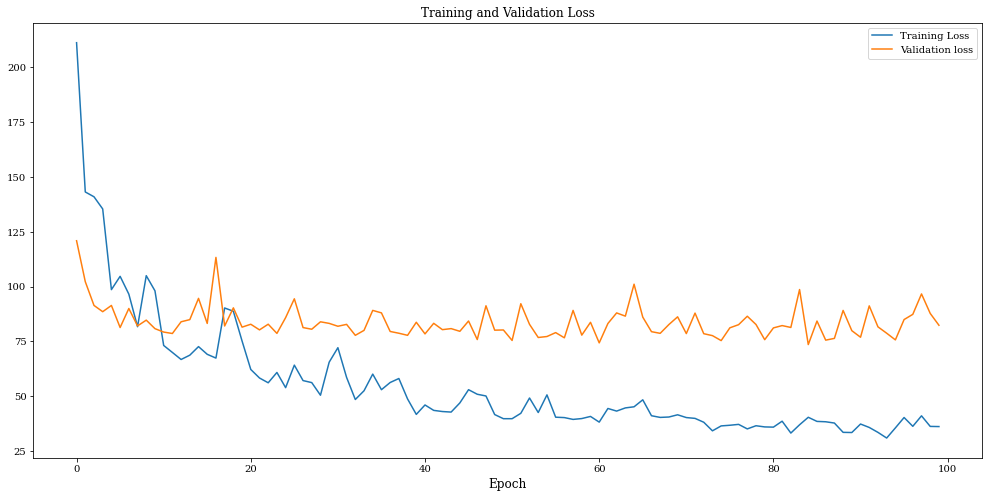

In [21]:
fig = plt.figure(figsize=(17,8))
plt.plot(history.history['loss'], label='Training Loss')
# axes[0].set_ylabel('Mean Absolute Percentage Error')
plt.xlabel('Epoch', fontsize=12)
plt.yticks(fontsize=10)
plt.xticks(fontsize=10)

plt.plot(history.history['val_mean_absolute_percentage_error'], label='Validation loss')
plt.title('Training and Validation Loss')
plt.legend()
# fig.title('Mean Absolute Percentage Error Loss')

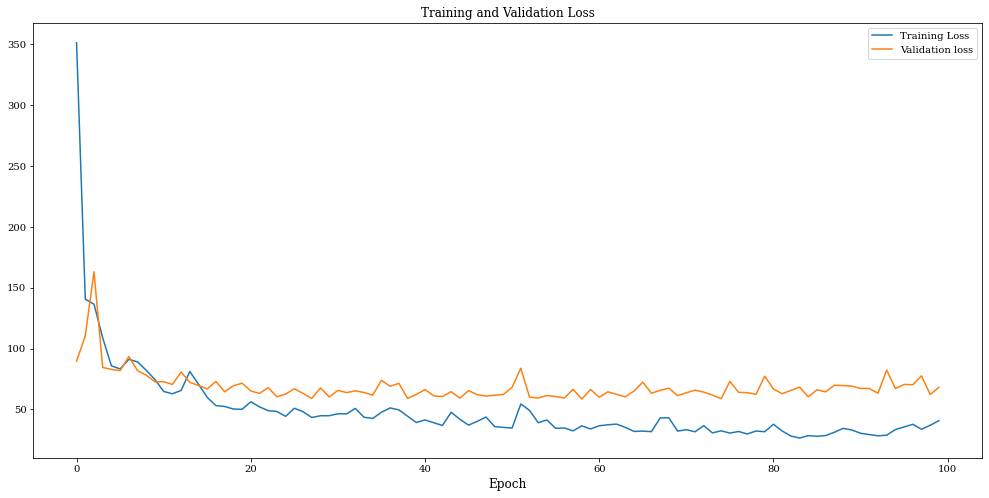

In [19]:
fig = plt.figure(figsize=(17,8))
plt.plot(history.history['loss'], label='Training Loss')
# axes[0].set_ylabel('Mean Absolute Percentage Error')
plt.xlabel('Epoch', fontsize=12)
plt.yticks(fontsize=10)
plt.xticks(fontsize=10)

plt.plot(history.history['val_mean_absolute_percentage_error'], label='Validation loss')
plt.title('Training and Validation Loss')
plt.legend()
# fig.title('Mean Absolute Percentage Error Loss')

Error: 63.65%
```
model.add(Conv2D(64, (3,3), padding='valid', strides=2, input_shape=X_train.shape[1:]))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64, (3,3), padding='valid', strides=2, input_shape=X_train.shape[1:]))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(AveragePooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(1))
```

Text(0.5, 0, 'Epoch')

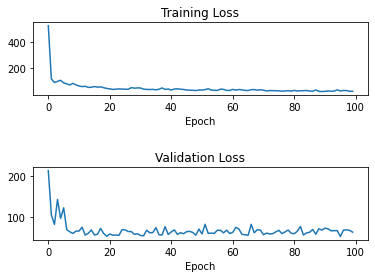

In [10]:
fig, axes = plt.subplots(2,1)
axes[0].plot(history.history['loss'])
axes[0].set_title('Training Loss')
# axes[0].set_ylabel('Mean Absolute Percentage Error')
axes[0].set_xlabel('Epoch')

fig.subplots_adjust(hspace=1)

axes[1].plot(history.history['val_mean_absolute_percentage_error'])
axes[1].set_title('Validation Loss')
axes[1].set_xlabel('Epoch')
# fig.title('Mean Absolute Percentage Error Loss')

Error: 73.31%
```
model.add(Conv2D(64, (3,3), padding='same', strides=1, input_shape=X_train.shape[1:]))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64, (3,3), padding='same', strides=1, input_shape=X_train.shape[1:]))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(AveragePooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(1))
```

Text(0.5, 0, 'Epoch')

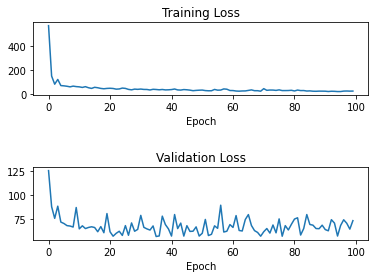

In [85]:
fig, axes = plt.subplots(2,1)
axes[0].plot(history.history['loss'])
axes[0].set_title('Training Loss')
# axes[0].set_ylabel('Mean Absolute Percentage Error')
axes[0].set_xlabel('Epoch')

fig.subplots_adjust(hspace=1)

axes[1].plot(history.history['val_mean_absolute_percentage_error'])
axes[1].set_title('Validation Loss')
axes[1].set_xlabel('Epoch')
# fig.title('Mean Absolute Percentage Error Loss')

Error : 70.15%
```
model.add(Conv2D(64, (3,3), padding='same', strides=2, input_shape=X_train.shape[1:]))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64, (3,3), padding='same', strides=2, input_shape=X_train.shape[1:]))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(AveragePooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(1))
```

Text(0.5, 0, 'Epoch')

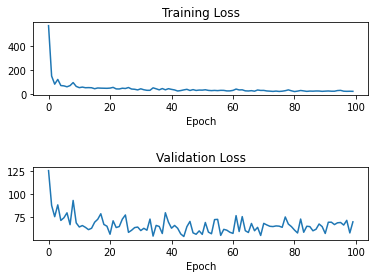

In [12]:
fig, axes = plt.subplots(2,1)
axes[0].plot(history.history['loss'])
axes[0].set_title('Training Loss')
# axes[0].set_ylabel('Mean Absolute Percentage Error')
axes[0].set_xlabel('Epoch')

fig.subplots_adjust(hspace=1)

axes[1].plot(history.history['val_mean_absolute_percentage_error'])
axes[1].set_title('Validation Loss')
axes[1].set_xlabel('Epoch')
# fig.title('Mean Absolute Percentage Error Loss')

Error : 82.15%
```
model.add(Conv2D(64, (3,3), padding='same', strides=2, input_shape=X_train.shape[1:]))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(128, (3,3), padding='same', strides=2, input_shape=X_train.shape[1:]))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(AveragePooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(1))
```

Text(0.5, 0, 'Epoch')

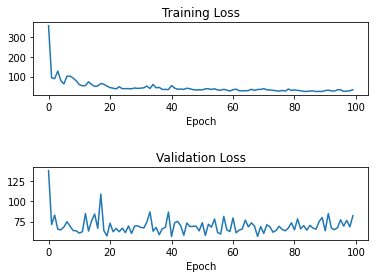

In [44]:
fig, axes = plt.subplots(2,1)
axes[0].plot(history.history['loss'])
axes[0].set_title('Training Loss')
# axes[0].set_ylabel('Mean Absolute Percentage Error')
axes[0].set_xlabel('Epoch')

fig.subplots_adjust(hspace=1)

axes[1].plot(history.history['val_mean_absolute_percentage_error'])
axes[1].set_title('Validation Loss')
axes[1].set_xlabel('Epoch')
# fig.title('Mean Absolute Percentage Error Loss')

The metric used in this problem to evaluate the performance is the same we used for training the model, the mean absolute percentage error. Mean absolute percentage error is defined as $\frac{100}{n} \sum_n \frac{|\hat{y} - y|}{|y|}$ where $y$ is the ground-truth, $\hat{y}$ is the estimation of the model and `n` the number of elements in the set we are evaluating.

In [87]:
prices_predicted = model.predict(X_val).flatten()
print(model.predict(X_val).shape)
print(Y_val.shape)
diff = ((prices_predicted - Y_val) / Y_val) * 100
error_mean = np.mean(np.abs(diff))

print("Predicting house prices - Estimation Error: {:.2f}%".format(error_mean))

4/4 [==============================] - 0s 3ms/step
(106, 1)
(106,)
Predicting house prices - Estimation Error: 53.11%


**Report**:


*   Propose a CNN architecture that has an estimation error in the validation set below 75%. 
*   Present a figure showing the training and validation loss vs the number of training epochs for different architectural design choices. Discuss the gap between the training and validation loss depending on the proposed architecture.
*   Report a table with results when using any of the other images from the house (kitchen, bedroom, and bathroom).